# Исследование рынка недвижимости Санкт-Петербурга



## Описание проекта

- С целью построения автоматизированной системы по контролю за аномалиями и мошеннической деятельностью необходимо выделить параметры, наиболее влияющие на общую стоимость объекта недвижимости, т.е. научиться определять рыночную стоимость объектов недвижимости. 

- Для исследования имеется архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах сервиса Яндекс.Недвижимость за несколько лет.

- По каждому объекту доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Цель исследования

В ходе исследования поставлена задача:
    **Изучить данные сервиса Яндекс Недвижимость за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах, на основании которых выяснить какие факторы больше всего влияют на общую (полную) стоимость объекта.**
    
    А именно, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год)
* расстояния до центра города

## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Импорт данных

In [2]:
data = pd.read_csv(
    '/Users/a/Desktop/Yandex/Analyse/Proj_git/real_estate_data.csv', sep='[\t]', engine='python')

data.columns = data.columns.str.replace('"', '')
data['total_images'] = data['total_images'].str.replace('"', '')
data['days_exposition'] = data['days_exposition'].str.replace('"', '')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  object 
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
len_data_1 = data.shape[0]
len_data_1

23699

**В датафрейме 23699 строк.**
Обращает на себя внимание тип данных object в first_day_exposition, вместо datatime, также столбец где должен содержаться булев массив is_apartment имеет формат object вместо bool

Также видим, что во многих столбцах есть пропуски

In [5]:
#приведем названия столбцов к нижнему регистру
data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest'}, inplace = True)
data.rename(columns = {'cityCenters_km' : 'city_centers_km'}, inplace = True)

In [6]:
data.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
count,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000
mean,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900
std,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000
25%,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000
50%,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000
75%,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000


**Высокое стандартное отклонение** в total_area, living_area, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, days_exposition
Можно предположить аномалии и выбросы в данных. 

**Построим обзорные гистограммы по имеющимся данным**

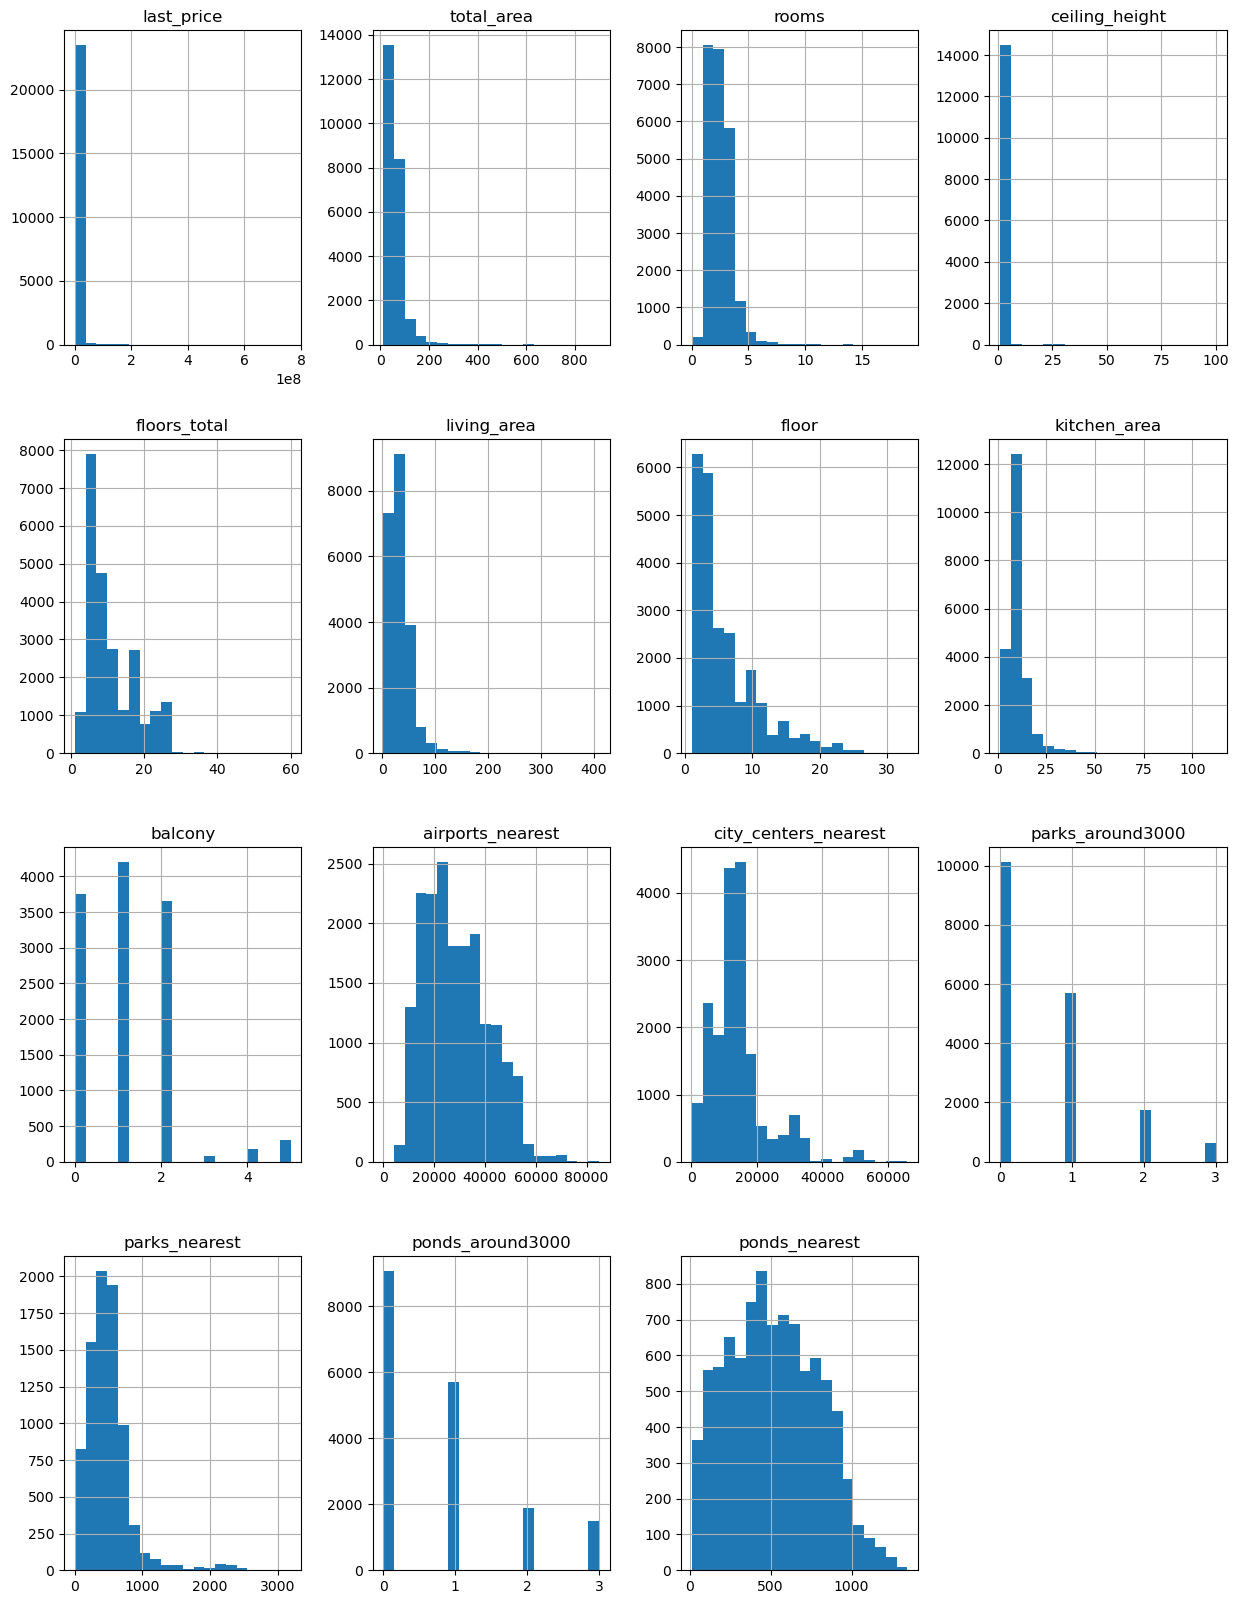

In [7]:
data.hist(bins=20, figsize=(15, 20));

**По первоначальным данным затруднительно сделать однозначные выводы**, требуется детально изучить каждый столбец, на первый взгляд обращает внимание, что среди объявление есть те, в которых нет ни одной фотографии. При продаже квартиры это как минимум странно. Приступим к детальному анализу данных.
    

## Предобработка данных

Подготовим функции для удобства отрисовки графиков

In [8]:
# пропущенные значения бары

def pass_value_barh(df):
    """отрисовка количества пропусков по столбцам
    параметр: датафрейм"""
    
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
            .set_title('Количество пропусков по столбцам' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

In [9]:
# отрисовка простой гистограммы

def show_hist(data, bins, name, size, range=None, ax=None):
    """отрисовка гистограммы, аргументы: данные, кол-во корзин, название графика,
    размер,не обязательные параметры: порядок сортировки, 
    ax при использовании show_hist в def plot_subplots"""

    if ax is None:
        ax = plt.gca()

    data.hist(bins=bins, figsize=size, range=range, ax=ax)
    ax.axvline(x=data.median(), color='red', linestyle='dashed')
    ax.legend(['median'])
    ax.set_title(name)

In [10]:
# гистограмммы в subplot

def plot_subplots(num_rows, plots, size, bins):
    """отрисовка гистограмм несколькими строками в одном столбце
    используется функция show_hist
    параметры: количество строк, список данных для построения, размер графика, кол-во корзин"""

    num_cols = 1  # количество столбцов

    fig, axs = plt.subplots(
        num_rows, num_cols, figsize=(20, 15))  # создаем subplots

    # размещаем графики в subplots
    for i, plot in enumerate(plots):
        ax = axs[i]  # обращаемся к i-му subplot

        show_hist(
            plot, bins, f'Гистограмма {plot.name}', size, range=None, ax=ax)

        # размер шрифта названия графика
        ax.set_title(f'Гистограмма {plot.name}', fontsize=16)
        # размер шрифта подписей осей
        ax.tick_params(axis='both', which='both', labelsize=14)

    plt.tight_layout()
    plt.show()

In [11]:
# Диаграмма рассеивания
def make_scatter (x, y, title):
    """отрисовка гиаграммы рассеивания, параметры: x,y, название графика"""
    
    data.plot(kind='scatter', y = y, x = x, alpha=0.5, subplots=True, figsize=(12,5), s=4)
    plt.title (f"Диаграмма рассеивания {title}")

In [12]:
# линейная диаграмма
def show_plot (data, title, ylabel):
    """отрисовка простой линейной диаграммы,
    параметры: данные, название графика, подпись оси Y"""
    
    plt.title(title)
    plt.ylabel(ylabel)
    data.plot(style='-4', figsize=(7,3))
    plt.show()

In [13]:
def show_quantile (data, column):
    """возвращает квантили распределения
    аргументы: набор данных, столбец"""
    
    return data[[column]].quantile([0.0012, 0.01, .5, .99, .9988]).style.format("{:,.2f}")

### Проверка на дубликаты

In [14]:
#полные дубликаты
data[data.duplicated()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [15]:
columns = ['living_area', 'total_area', 'kitchen_area',
           'rooms', 'ceiling_height', 'floors_total',
           'floor', 'locality_name', 'city_centers_nearest', 'ponds_around3000', 'parks_around3000']

dup_data = data[data.duplicated(subset=columns, keep=False)].sort_values(
    by=['total_area', 'locality_name', 'first_day_exposition'])

dup_data[['total_images', 'last_price', 'total_area', 'kitchen_area',
         'first_day_exposition', 'days_exposition', 'rooms', 'ceiling_height', 'floor',
         'floors_total', 'locality_name', 'city_centers_nearest']]

,total_images,last_price,total_area,kitchen_area,first_day_exposition,days_exposition,rooms,ceiling_height,floor,floors_total,locality_name,city_centers_nearest
12873,5,2050000.0,31.0,NaN,2017-12-15T00:00:00,39.0,1,NaN,2,5.0,Выборг,NaN
8660,7,1850000.0,31.0,NaN,2018-03-17T00:00:00,45.00000000000001,1,NaN,2,5.0,Выборг,NaN
3634,11,3550000.0,38.0,10.00,2017-06-02T00:00:00,18.0,1,NaN,5,22.0,деревня Кудрово,NaN
13896,14,3650000.0,38.0,10.00,2017-11-03T00:00:00,10.0,1,NaN,5,22.0,деревня Кудрово,NaN
452,9,1950000.0,42.0,6.00,2017-08-04T00:00:00,83.0,2,NaN,3,5.0,Выборг,NaN
1376,6,2500000.0,42.0,6.00,2019-03-06T00:00:00,,2,NaN,3,5.0,Выборг,NaN
12590,10,4370000.0,42.0,10.00,2017-01-23T00:00:00,442.0,1,NaN,20,23.0,Санкт-Петербург,11313.0
2170,9,4410000.0,42.0,10.00,2018-03-27T00:00:00,29.0,1,NaN,20,23.0,Санкт-Петербург,11313.0
9661,1,2533531.0,42.5,NaN,2016-09-08T00:00:00,627.0,1,2.56,7,18.0,Никольское,NaN
9886,1,2533531.0,42.5,NaN,2016-11-25T00:00:00,549.0,1,2.56,7,18.0,Никольское,NaN


В наборе можно заподозрить наличие неявных дубликатов,
связаных с перепубликацией объявления в связи с изменением цены в меньшую или большую сторону.

Однако однозначно сказать дубликат ли это или объявление о продаже квартиры на этом же этаже этого же дома нельзя, так уникальных идентификаторов у объектов недвижимости нет. Проводить удаление данных без уверенности что это дубликат считаю некорректным.

Удалю только строку 9661, Так как кроме населенного пункта и других параметров цена совпадает до рубля 2,533,531.0 Удаляю более ранюю запись из двух по этому объекту.

In [16]:
data = data.drop (index= 9661 )

**Рассмотрим каждый столбец датафрейма. Определим аномальные значения и пропуски. Заполним пропуски где это возможно.**

Для определения выбросов будем использовать квантили и визуализацию данных в виде гистограмм.
Значения квантилей:
- 0.0012 - значение, ниже которого находится 0.12% значений выборки
- 0.01 - значение, ниже которого находится 1% значений выборки
- 0.5 - медиана, значение, ниже которого находится 50% значений выборки
- 0.99 - значение, ниже которого находится 99% значений выборки
- 0.9988 - значение, ниже которого находится 99.88% значений выборки


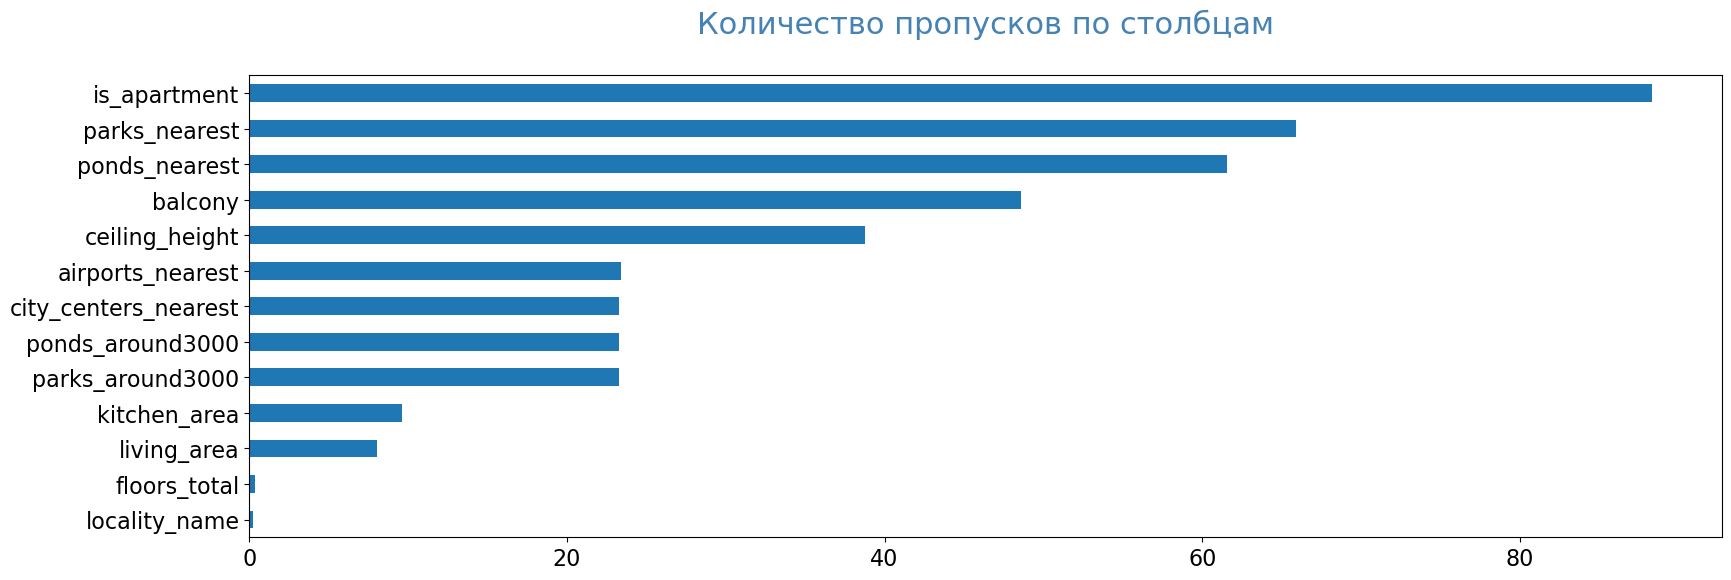

In [17]:
pass_value_barh(data)

### total_images

**total_images — число фотографий квартиры в объявлении**

In [18]:
data['total_images'].describe()

count     23698
unique       38
top          10
freq       1798
Name: total_images, dtype: object

In [19]:
data['total_images'] = data['total_images'].astype(int)

In [20]:
data.query('total_images>30').sort_values(by='total_images', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9778,50,11000000.0,87.0,2017-10-25T00:00:00,2,NaN,25.0,32.5,11,NaN,...,31.0,5.0,Санкт-Петербург,9586.0,11649.0,0.0,NaN,0.0,NaN,3.0000000000000004
12667,50,20500000.0,76.0,2017-12-10T00:00:00,3,NaN,20.0,47.0,16,NaN,...,29.0,NaN,Санкт-Петербург,50812.0,16141.0,0.0,NaN,0.0,NaN,5.0
17396,50,14500000.0,119.7,2017-12-02T00:00:00,4,4.0,4.0,87.5,3,NaN,...,13.5,NaN,Санкт-Петербург,24375.0,2410.0,1.0,551.0,2.0,617.0,106.0
15157,42,17998000.0,138.6,2017-09-27T00:00:00,4,NaN,18.0,93.1,17,NaN,...,16.0,2.0,Санкт-Петербург,34991.0,11920.0,0.0,NaN,0.0,NaN,172.0
1058,39,1900000.0,63.0,2017-09-29T00:00:00,3,NaN,5.0,44.2,5,NaN,...,6.3,1.0,деревня Лопухинка,NaN,NaN,NaN,NaN,NaN,NaN,106.0
21199,37,11500000.0,65.7,2018-02-01T00:00:00,2,NaN,25.0,23.0,10,NaN,...,21.0,2.0,Санкт-Петербург,10663.0,12738.0,0.0,NaN,0.0,NaN,64.0
308,35,5700000.0,83.9,2018-02-01T00:00:00,3,2.6,5.0,51.8,2,NaN,...,9.6,NaN,Красное Село,27245.0,30670.0,0.0,NaN,0.0,NaN,47.00000000000001
10523,35,17000000.0,90.0,2017-11-10T00:00:00,3,NaN,16.0,52.0,6,NaN,...,14.0,4.0,Санкт-Петербург,30215.0,6255.0,0.0,NaN,1.0,113.0,35.0
99,32,9600000.0,90.0,2017-09-26T00:00:00,4,NaN,5.0,67.0,2,NaN,...,8.0,NaN,Санкт-Петербург,23277.0,2818.0,0.0,NaN,0.0,NaN,104.0
7393,32,8290000.0,113.2,2017-04-28T00:00:00,4,NaN,6.0,70.4,4,NaN,...,10.4,NaN,Санкт-Петербург,24177.0,2342.0,2.0,356.0,3.0,457.0,225.0


50 фотографий для 2-х и 3-х комнатной квартиры может быть достаточно много, но вполне возможно. Более неправдоподобно полное отсутствие фотографий. Проверим сколько таких объявлений.

In [21]:
data.query('total_images==0').sort_values(by='last_price', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
17179,0,50788000.0,161.00,2015-10-27T00:00:00,3,NaN,6.0,86.00,3,NaN,...,21.00,1.0,Санкт-Петербург,32999.0,5856.0,1.0,607.0,3.0,757.0,272.0
7136,0,48000000.0,108.00,2018-02-01T00:00:00,3,NaN,5.0,61.00,2,NaN,...,13.50,NaN,Санкт-Петербург,24632.0,3180.0,1.0,551.0,3.0,415.0,144.0
11710,0,41484000.0,160.00,2015-02-28T00:00:00,3,NaN,6.0,86.00,3,NaN,...,21.00,1.0,Санкт-Петербург,32999.0,5856.0,1.0,607.0,3.0,757.0,513.0
18832,0,40348248.0,284.00,2016-11-24T00:00:00,4,NaN,NaN,104.76,6,NaN,...,14.77,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,256.0
5873,0,38000000.0,400.00,2019-03-15T00:00:00,7,3.6,3.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,24889.0,5457.0,1.0,271.0,0.0,NaN,
15004,0,35000000.0,90.00,2018-08-22T00:00:00,3,NaN,7.0,80.00,6,NaN,...,10.00,1.0,Санкт-Петербург,25393.0,4096.0,1.0,247.0,1.0,656.0,16.0
19771,0,33800000.0,147.00,2017-11-10T00:00:00,4,3.0,8.0,88.20,2,NaN,...,13.80,0.0,Санкт-Петербург,24764.0,5332.0,3.0,134.0,0.0,NaN,3.0000000000000004
19221,0,30000000.0,301.90,2018-02-01T00:00:00,6,3.0,8.0,163.20,3,NaN,...,20.40,NaN,Санкт-Петербург,26872.0,5574.0,3.0,128.0,1.0,276.0,29.0
10157,0,28177652.0,171.96,2018-09-04T00:00:00,4,NaN,10.0,NaN,10,NaN,...,28.40,NaN,Санкт-Петербург,31163.0,3430.0,1.0,465.0,3.0,115.0,


In [22]:
data = data.query('total_images>0')

Исключим эти строки, так как у части объявлений срок которое висело объявление отсутствует или он очень маленький, можно предположить что объявление было сделано ошибочно и вскоре удалено, у других же кроме прочего пропуски в других важных значениях.

In [23]:
data['total_images'].isna().sum()

0

### last_price

**last_price — цена на момент снятия с публикации**

In [24]:
# избавимся от экспоненциальных форм 
pd.options.display.float_format = '{:,.1f}'.format

data['last_price'].describe()

count        22,639.0
mean      6,598,826.5
std      11,085,114.8
min          12,190.0
25%       3,450,000.0
50%       4,650,000.0
75%       6,800,000.0
max     763,000,000.0
Name: last_price, dtype: float64

Стандартное отклонение огромное. Максимальное значение 763 миллиона. В Петербурге достаточно элитного жилья, всё может быть, а вот минимальное в 12 тысяч рублей аномально маленькое. Изучим значения меньше 500 тысяч рублей.

In [25]:
data.query('last_price< 500000').sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,"12,190.0",109.0,2019-03-20T00:00:00,2,2.8,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,"36,421.0","9,176.0",1.0,805.0,0.0,NaN,8.0
14911,5,"430,000.0",54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,...,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.00000000000001
17456,7,"430,000.0",30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,...,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,
16274,18,"440,000.0",40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
5698,7,"450,000.0",42.0,2017-07-31T00:00:00,2,NaN,1.0,23.0,1,NaN,...,5.8,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
9581,7,"450,000.0",43.4,2018-08-31T00:00:00,2,NaN,5.0,30.3,3,NaN,...,5.5,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
16219,14,"450,000.0",38.5,2018-07-11T00:00:00,2,2.6,2.0,NaN,1,NaN,...,NaN,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
18867,1,"470,000.0",41.0,2018-02-11T00:00:00,1,NaN,5.0,32.0,3,NaN,...,9.0,NaN,деревня Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.00000000000001
23484,11,"470,000.0",44.5,2018-07-02T00:00:00,2,NaN,2.0,28.0,2,NaN,...,7.5,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298.0
16032,8,"480,000.0",32.0,2019-01-06T00:00:00,1,NaN,2.0,16.0,1,NaN,...,NaN,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.0


Аномально маленькое значение в одной строке. Учитывая параметры квартиры (г. Санкт-Петербург, 2 комнаты, новостройка(судя по количеству этажей), рядом парк, большой метраж) допущена ошибка и цена указана в тысячах, т.е. цена квартиры более 12 миллионов. Исправим данные

In [26]:
data.loc[8793, 'last_price']

12190.0

In [27]:
data.loc[8793, 'last_price'] = data.loc[8793, 'last_price'] * 1000

In [28]:
data.loc[8793, 'last_price']

12190000.0

In [29]:
# Значения параметров объектов недвижимости на разных квантилях
show_quantile (data, 'last_price')

,last_price
0.001200,"580,828.00"
0.010000,"1,000,000.00"
0.500000,"4,650,000.00"
0.990000,"36,731,000.00"
0.998800,"129,172,000.00"


Квантили распредеделения данных о стоимости объекта недвижимости:

- 580,828 руб - значение, ниже которого находится 0.12% значений выборки
- 1,000,000 - значение, ниже которого находится 1% значений выборки
- 4,650,000 - медиана, значение, ниже которого находится 50% значений выборки
- 36,731,000 - значение, ниже которого находится 99% значений выборки
- более 129 млн рублей - значение, ниже которого находится 99.88% значений выборки


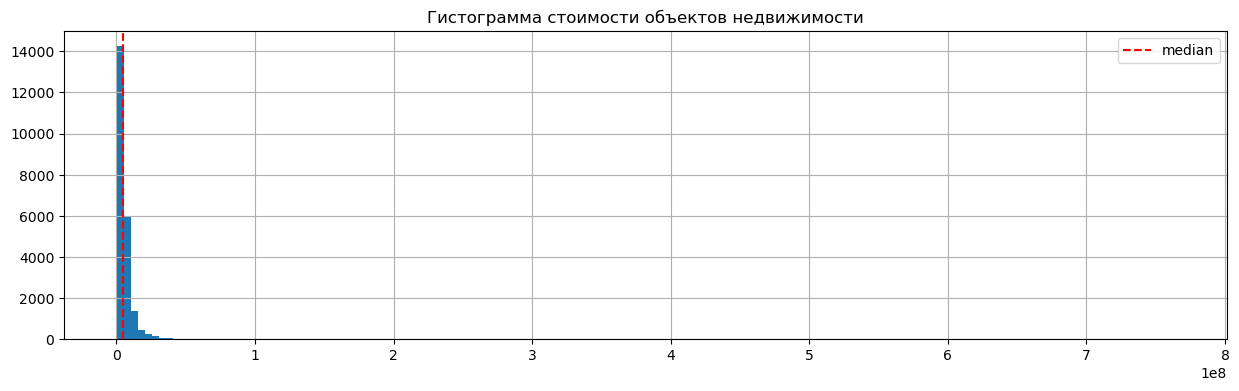

In [30]:
show_hist(data['last_price'], 150, 'Гистограмма стоимости объектов недвижимости', (15,4))

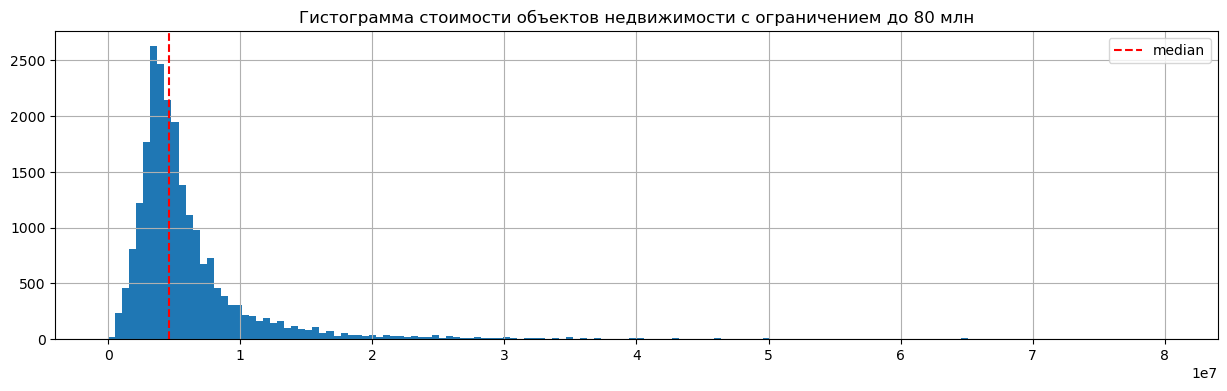

In [31]:
show_hist(data['last_price'], 150,
          'Гистограмма стоимости объектов недвижимости с ограничением до 80 млн', (15,4), range=(0, 80000000))

Теперь изучим самые большие значения. Укажем стоимость превышающую 80 миллионов

In [32]:
data.query('last_price > 80000000').sort_values(by='last_price', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,"763,000,000.0",400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,"25,108.0","3,956.0",1.0,530.0,3.0,756.0,33.0
19540,8,"420,000,000.0",900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,"30,706.0","7,877.0",0.0,NaN,2.0,318.0,106.0
14706,15,"401,300,000.0",401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,"21,912.0","2,389.0",1.0,545.0,1.0,478.0,393.0
1436,19,"330,000,000.0",190.0,2018-04-04T00:00:00,3,3.5,7.0,95.0,5,NaN,...,40.0,NaN,Санкт-Петербург,"23,011.0","1,197.0",3.0,519.0,3.0,285.0,233.0
15651,20,"300,000,000.0",618.0,2017-12-18T00:00:00,7,3.4,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,"32,440.0","5,297.0",0.0,NaN,2.0,198.0,111.0
22831,18,"289,238,400.0",187.5,2019-03-19T00:00:00,2,3.4,6.0,63.7,6,NaN,...,30.2,NaN,Санкт-Петербург,"22,494.0","1,073.0",3.0,386.0,3.0,188.0,
16461,17,"245,000,000.0",285.7,2017-04-10T00:00:00,6,3.4,7.0,182.8,4,NaN,...,29.8,NaN,Санкт-Петербург,"33,143.0","6,235.0",3.0,400.0,3.0,140.0,249.0
13749,7,"240,000,000.0",410.0,2017-04-01T00:00:00,6,3.4,7.0,218.0,7,NaN,...,40.0,0.0,Санкт-Петербург,"32,440.0","5,297.0",0.0,NaN,2.0,198.0,199.0
5893,3,"230,000,000.0",500.0,2017-05-31T00:00:00,6,NaN,7.0,NaN,7,NaN,...,40.0,0.0,Санкт-Петербург,"32,440.0","5,297.0",0.0,NaN,2.0,198.0,50.0
8900,13,"190,870,000.0",268.0,2016-03-25T00:00:00,3,NaN,8.0,132.0,7,NaN,...,40.0,NaN,Санкт-Петербург,"32,440.0","5,297.0",0.0,NaN,2.0,198.0,901.0


учитывая площадь квартир и другие параметры, цены вполне имеют право на существование..однако для нашего исследовательского анализа важнее массовый сегмент застройки.
Медиана стоимости объекта составляет 4,650,000 руб и только 1% объектов превышает по стоимости 36 миллионов рублей  в связи с этим округлим в меньшую сторону и **отфильтруем и отбросим квартиры, стоимость которых превышает 30 миллионов**

In [33]:
data = data.query('last_price <=30000000')

In [34]:
#проверка на пропуски
data['last_price'].isna().sum()

0

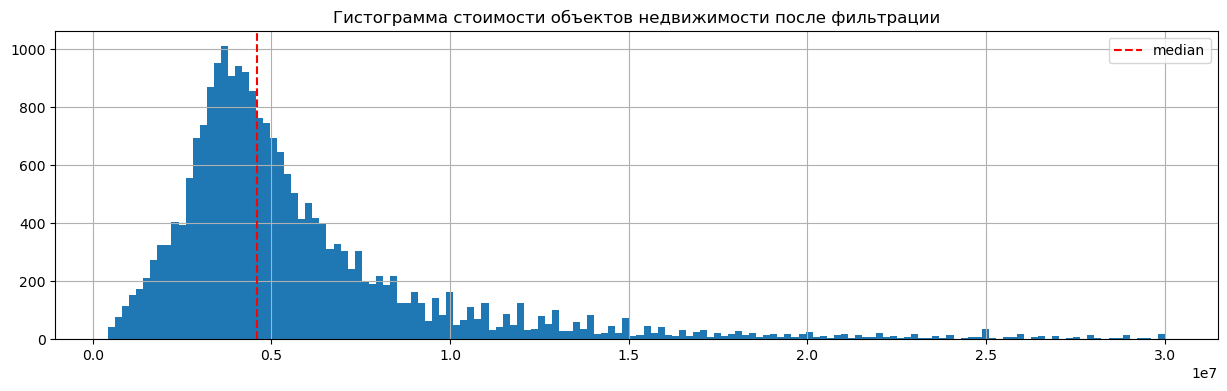

In [35]:
show_hist(data['last_price'], 150, 'Гистограмма стоимости объектов недвижимости после фильтрации',(15,4))

Пропусков в данных нет. Аномальные значения и выбросы обработаны. Предложения премиум застройки оставлены в наборе данных для более обширного анализа. Переходим к следующему столбцу.

### total_area

**total_area  — общая площадь квартиры в квадратных метрах (м²)**

In [36]:
data['total_area'].describe()

count   22,331.0
mean        58.4
std         28.3
min         12.0
25%         40.0
50%         52.0
75%         69.0
max        460.8
Name: total_area, dtype: float64

Изучим данные по квартирам с площадью больше 200 квадратных метров и меньше 14

In [37]:
data.query('total_area>200').sort_values(by='total_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20273,12,"20,000,000.0",460.8,2019-03-20T00:00:00,6,3.1,3.0,279.6,1,NaN,...,55.5,NaN,Санкт-Петербург,"43,756.0","15,459.0",1.0,852.0,3.0,122.0,21.0
3676,12,"28,789,000.0",442.0,2019-01-23T00:00:00,4,NaN,6.0,NaN,6,NaN,...,35.0,NaN,Санкт-Петербург,"20,552.0","5,181.0",0.0,NaN,0.0,NaN,
22131,14,"27,000,000.0",422.2,2018-10-18T00:00:00,5,2.7,13.0,NaN,11,NaN,...,NaN,NaN,Санкт-Петербург,"46,625.0","16,554.0",0.0,NaN,0.0,NaN,
866,5,"25,000,000.0",363.0,2017-12-23T00:00:00,14,3.2,5.0,222.0,4,NaN,...,16.6,NaN,Санкт-Петербург,"38,076.0","7,950.0",0.0,NaN,2.0,435.0,418.0
16179,11,"28,000,000.0",336.0,2017-09-27T00:00:00,5,3.0,3.0,106.1,2,NaN,...,21.0,1.0,Санкт-Петербург,"15,036.0","14,795.0",2.0,668.0,0.0,NaN,172.0
14591,20,"29,000,000.0",327.2,2017-11-15T00:00:00,6,NaN,4.0,177.3,4,NaN,...,27.1,NaN,Санкт-Петербург,"53,531.0","18,024.0",0.0,NaN,2.0,194.0,274.0
11087,3,"14,000,000.0",320.0,2017-09-27T00:00:00,6,NaN,3.0,190.0,3,NaN,...,28.0,0.0,Красное Село,"26,020.0","29,445.0",1.0,569.0,0.0,NaN,8.0
11436,4,"24,000,000.0",316.3,2015-03-25T00:00:00,8,NaN,5.0,187.0,5,NaN,...,NaN,0.0,Санкт-Петербург,"24,555.0","5,129.0",0.0,NaN,1.0,934.0,542.0
9550,10,"23,500,000.0",313.0,2017-02-13T00:00:00,9,3.2,6.0,179.2,5,NaN,...,13.2,NaN,Санкт-Петербург,"38,435.0","10,138.0",1.0,146.0,0.0,NaN,
9561,2,"24,900,000.0",312.0,2015-11-27T00:00:00,5,3.0,2.0,127.0,2,False,...,24.0,1.0,Санкт-Петербург,"38,164.0","11,736.0",1.0,287.0,1.0,203.0,392.0


In [38]:
data.query('total_area<=14').sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,"2,400,000.0",12.0,2017-07-19T00:00:00,1,2.5,5.0,10.0,2,NaN,...,NaN,NaN,Санкт-Петербург,"21,314.0",964.0,1.0,886.0,2.0,45.0,200.0
17961,3,"1,400,000.0",13.0,2017-12-03T00:00:00,1,2.6,9.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,"14,350.0","15,945.0",0.0,NaN,1.0,185.0,410.0
19546,3,"1,850,000.0",13.0,2019-03-11T00:00:00,1,3.4,5.0,NaN,2,False,...,NaN,NaN,Санкт-Петербург,"24,915.0","5,483.0",1.0,644.0,0.0,NaN,24.000000000000004
19558,2,"1,686,000.0",13.2,2018-12-17T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,"19,891.0","4,165.0",1.0,361.0,1.0,155.0,19.0
19642,5,"1,190,000.0",14.0,2018-07-29T00:00:00,1,NaN,5.0,11.0,1,NaN,...,2.0,NaN,Санкт-Петербург,"9,898.0","11,122.0",0.0,NaN,0.0,NaN,4.0


In [39]:
data['total_area'].isna().sum()

0

In [40]:
# Значения параметров объектов недвижимости на разных квантилях
show_quantile (data, 'total_area')

,total_area
0.001200,20.00
0.010000,25.31
0.500000,52.00
0.990000,165.20
0.998800,251.41


Квантили распредеделения данных об общей площади объекта недвижимости:

- 20 квадратных метров общей площади - значение, ниже которого находится 0.12% значений выборки
- 25 кв.м - значение, ниже которого находится 1% значений выборки
- 52 кв.м - медиана, значение, ниже которого находится 50% значений выборки
- 165 кв.м - значение, ниже которого находится 99% значений выборки
- 251 кв.м - значение, ниже которого находится 99.88% значений выборки

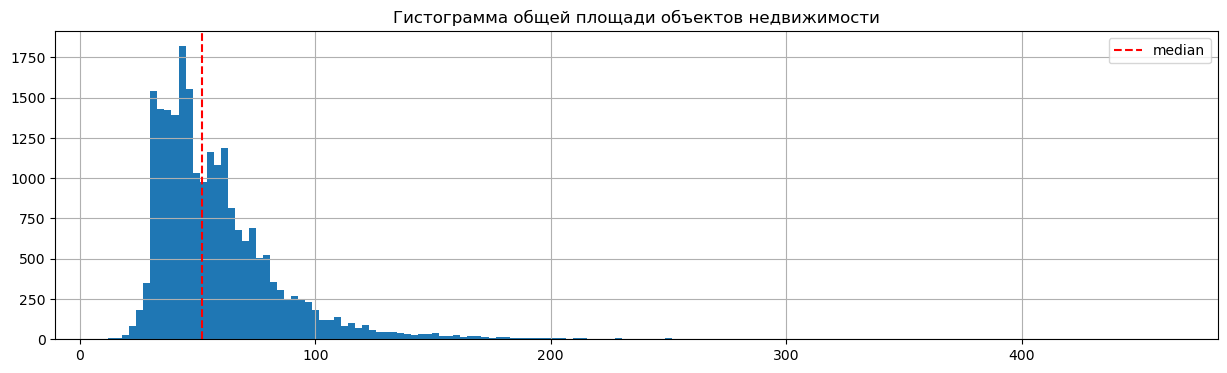

In [41]:
show_hist(data['total_area'], 150, 'Гистограмма общей площади объектов недвижимости',(15,4))

Пропусков в данных нет. **Отфильтруем данные, оставив в наборе данных значения общей площади не превышающие 250 метров, но более 20 метров.**

In [42]:
data = data.query('total_area>=20 or total_area<=250')

Проверим данные на наличие аномальных значений, а именно есть ли строки в которых сумма жилой площади и площади кухни больше указанной общей площади.

In [43]:
len(data.query('total_area < (living_area + kitchen_area)'))

62

62 строки в которых сложно сделать вывод в каких именно даннных допущена ошибка, соотственно и понять какие данные изменять и можно ли это сделать правдоподобно - сложно. Количество составляет менее 0.5% от общего количества строк. Удалим эти строки со строгим контролем чтобы не удалились лишние данные

In [44]:
len_1 = data.shape[0]
print (f"длина датафрейма до фильтрации {len_1} строк")

длина датафрейма до фильтрации 22331 строк


In [45]:
nan_1_liv = data[data['living_area'].isna()]['total_images'].count()
nan_1_kit = data[data['kitchen_area'].isna()]['total_images'].count()

print (f"Первоначальное количество пропусков в living_area - {nan_1_liv}")
print (f"Первоначальное количество пропусков в kitchen_area - {nan_1_kit}")

Первоначальное количество пропусков в living_area - 1717
Первоначальное количество пропусков в kitchen_area - 2058


In [46]:
#Заполним временно пропуски значением -0.01 чтобы строки с пропусками не удалились при фильтрации
data[['living_area', 'kitchen_area']] = data[['living_area', 'kitchen_area']].fillna(-0.01)

#фильтрация
data = data.query('total_area >= (living_area + kitchen_area)')

len_2 = data.shape[0] # длина датафрейма после фильтрации

# check
print (f"Количество удаленных строк {len_1- len_2}")

Количество удаленных строк 62


Удалено необходимое количество строк. Вернем пропуски в living_area и kitchen_area

In [47]:
data.loc[data['living_area'] == -0.01, 'living_area'] = np.nan
data.loc[data['kitchen_area'] == -0.01, 'kitchen_area'] = np.nan

In [48]:
# check
nan_2_liv = data[data['living_area'].isna()]['total_images'].count()
nan_2_kit = data[data['kitchen_area'].isna()]['total_images'].count()

print (f"Количество пропусков в living_area после фильтрации- {nan_2_liv}")
print (f"Количество пропусков в kitchen_area после фильтрации- {nan_2_kit}")

Количество пропусков в living_area после фильтрации- 1717
Количество пропусков в kitchen_area после фильтрации- 2058


Данные о пропусках вернули корректно

### living_area — жилая площадь в квадратных метрах (м²)

In [49]:
data['living_area'].describe()

count   20,552.0
mean        33.4
std         18.5
min          2.0
25%         18.5
50%         30.0
75%         42.0
max        279.6
Name: living_area, dtype: float64

Минимальное значение 2 квадратных метра аномально маленькое. Установим минимально возможное значение 8 метров и изучим данные.

Для собственной справки: Жилая площадь входит в состав общего метража. При её определении в расчёт берутся размеры только тех комнат, которые пригодны для проживания (спальня, детская, гостиная). К жилой площади не относятся кухни, коридоры, санузлы, кладовые, встроенные шкафы, балконы и лоджии.

In [50]:
# Значения параметров объектов недвижимости на разных квантилях
show_quantile (data, 'living_area')

,living_area
0.001200,10.00
0.010000,13.00
0.500000,30.00
0.990000,101.40
0.998800,161.60


Квантили распредеделения данных о жилой площади объекта недвижимости:

- 10 квадратных метров жилой площади - значение, ниже которого находится 0.12% значений выборки
- 13 кв.м - значение, ниже которого находится 1% значений выборки
- 30 кв.м - медиана, значение, ниже которого находится 50% значений выборки
- 101 кв.м - значение, ниже которого находится 99% значений выборки
- 161 кв.м - значение, ниже которого находится 99.88% значений выборки

In [51]:
data.query('living_area<10').sort_values(by='total_area', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21943,15,"6,100,000.0",77.6,2019-02-28T00:00:00,4,2.5,9.0,5.4,1,NaN,...,9.8,NaN,Санкт-Петербург,"29,338.0","11,270.0",1.0,584.0,0.0,NaN,33.0
2309,10,"4,200,000.0",62.4,2017-06-15T00:00:00,2,2.6,9.0,8.4,6,NaN,...,41.0,2.0,посёлок Шушары,"23,662.0","29,448.0",0.0,NaN,0.0,NaN,111.0
8325,9,"4,800,000.0",52.0,2017-10-25T00:00:00,2,NaN,5.0,9.0,2,NaN,...,6.0,1.0,Санкт-Петербург,"33,358.0","13,171.0",0.0,NaN,2.0,118.0,119.0
1326,8,"8,100,000.0",52.0,2017-01-29T00:00:00,2,2.7,25.0,9.0,15,NaN,...,32.0,2.0,Санкт-Петербург,"35,555.0","15,561.0",0.0,NaN,1.0,"1,180.0",337.0
13915,20,"6,350,000.0",52.0,2018-02-06T00:00:00,2,3.0,6.0,2.0,2,NaN,...,9.0,NaN,Санкт-Петербург,"32,453.0","6,521.0",0.0,NaN,1.0,"1,012.0",91.0


Жилая площадь 5.4 метра при общей в 77 - невозможна, как и в двухкомнатных с общей площадью 50-60 метров, 9 метров жилой площади аномально мало. 

**Отфильтруем данные, оставив в наборе данных объекты с жилой площадью не менее 10 квадратных метров и не более 160.**

In [52]:
# фильтрация с контролем сохранения пропусков

print(f"количество строк к удалению {len(data.query('living_area<10 or living_area>160'))}")

len_3 = data.shape[0]
print (f"длина датафрейма до фильтрации {len_3} строк")

nan_3_liv = data[data['living_area'].isna()]['total_images'].count()
print (f"первоначальное количество пропусков в living_area - {nan_3_liv}")

количество строк к удалению 48
длина датафрейма до фильтрации 22269 строк
первоначальное количество пропусков в living_area - 1717


In [53]:
#Фильтрация
data = data.query('(living_area>=10 and living_area<=160) or living_area.isnull()')

# длина датафрейма после фильтрации
len_4 = data.shape[0] 

# check
print (f"Количество удаленных строк {len_3- len_4}")

# check
nan_4_liv = data[data['living_area'].isna()]['total_images'].count()
print (f"Количество пропусков в living_area после фильтрации- {nan_4_liv}")

Количество удаленных строк 48
Количество пропусков в living_area после фильтрации- 1717


In [54]:
data['living_area'].describe()

count   20,504.0
mean        33.2
std         17.7
min         10.0
25%         18.5
50%         30.0
75%         42.0
max        160.0
Name: living_area, dtype: float64

**Изучим пропуски в данных о жилой площади.**

In [55]:
data['living_area'].isna().sum()

1717

Аномальные значения обработаны, заполнение пропусков считаю нецелесообразным, так как не представляется возможным составить алгоритм, который бы корректно, без аномалий заполнял пропуски. При заполнении пропусков медианой или средним даже с группировкой по населенному пункту и количеству комнат в квартире рискуем получить аномалии, когда общая площадь будет больше чем жилая так как очень большой разброс в площади квартир при разном количестве комнат.

### rooms

**rooms — число комнат**

In [56]:
data['rooms'].describe()

count   22,221.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         11.0
Name: rooms, dtype: float64

минимальное значение 0, предполагаю что это квартиры-студии, максимальное 8, стандартное отклонение небольшое. Изучим данные. Средняя площадь студии 25 метров, студии премиум сегмента могут быть до 50 метров. Установим пороговое значение общей площади 50 метров квадратных.

In [57]:
data.query('rooms==0 and total_area>50')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3458,6,"7,400,000.0",73.6,2017-05-18T00:00:00,0,NaN,3.0,50.0,1,NaN,...,NaN,0.0,Санкт-Петербург,"26,581.0","6,085.0",0.0,NaN,1.0,348.0,60.0
13613,16,"8,100,000.0",58.4,2019-04-26T00:00:00,0,3.3,7.0,33.0,6,NaN,...,NaN,NaN,Санкт-Петербург,"14,509.0","8,288.0",0.0,NaN,0.0,NaN,
20082,10,"16,300,000.0",98.4,2017-11-08T00:00:00,0,3.1,5.0,60.5,2,NaN,...,NaN,NaN,Санкт-Петербург,"26,972.0","5,819.0",0.0,NaN,1.0,674.0,537.0


если считать количество комнат 0 - обозначение квартиры-студии, то странным выглядят квартиры с площадью более 50 метров. В теории это может быть только что построенная квартира, без отделки и без межкомнатных перегородок, чтобы покупатель мог сделать планировку "под себя", а таком случае это действительно квартира-студия.

Изучим данные по квартирам с максимальным оставшимся количеством комнат.

In [58]:
data.query('rooms>=8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,"17,500,000.0",183.7,2018-07-01T00:00:00,11,3.4,7.0,138.8,7,NaN,...,13.3,NaN,Санкт-Петербург,"23,606.0","3,148.0",0.0,NaN,0.0,NaN,
813,7,"16,500,000.0",229.0,2016-02-25T00:00:00,8,NaN,6.0,160.0,5,NaN,...,25.0,NaN,Санкт-Петербург,"23,968.0","4,536.0",1.0,243.0,0.0,NaN,806.0
4149,6,"23,000,000.0",272.6,2018-01-11T00:00:00,10,3.1,7.0,145.9,7,NaN,...,18.8,1.0,Санкт-Петербург,"10,726.0","12,169.0",1.0,191.0,1.0,531.0,
4435,13,"22,190,000.0",191.2,2017-12-05T00:00:00,8,2.9,6.0,115.8,1,NaN,...,5.0,NaN,Санкт-Петербург,"21,589.0","1,152.0",1.0,587.0,2.0,155.0,115.0
8758,5,"16,100,000.0",150.0,2018-07-10T00:00:00,8,2.9,5.0,107.0,1,NaN,...,7.2,NaN,Санкт-Петербург,"26,080.0","4,782.0",2.0,473.0,0.0,NaN,
8860,12,"17,000,000.0",235.0,2018-07-14T00:00:00,9,3.0,6.0,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,"24,466.0","5,034.0",1.0,346.0,0.0,NaN,90.00000000000001
12447,8,"19,900,000.0",210.3,2016-04-18T00:00:00,8,3.3,5.0,144.6,2,NaN,...,23.6,0.0,Санкт-Петербург,"24,770.0","5,864.0",2.0,283.0,0.0,NaN,102.0
20788,7,"18,000,000.0",245.0,2017-04-06T00:00:00,8,3.5,5.0,155.0,2,NaN,...,NaN,NaN,Санкт-Петербург,"22,215.0","2,424.0",1.0,867.0,1.0,340.0,357.00000000000006


Общая площадь и цена соответствуют количеству комнат. Изучим есть ли пропуски и отфильтруем данные, отбросив квартиры с чрезмерно большим количеством комнат для анализа.

In [59]:
data['rooms'].isna().sum()

0

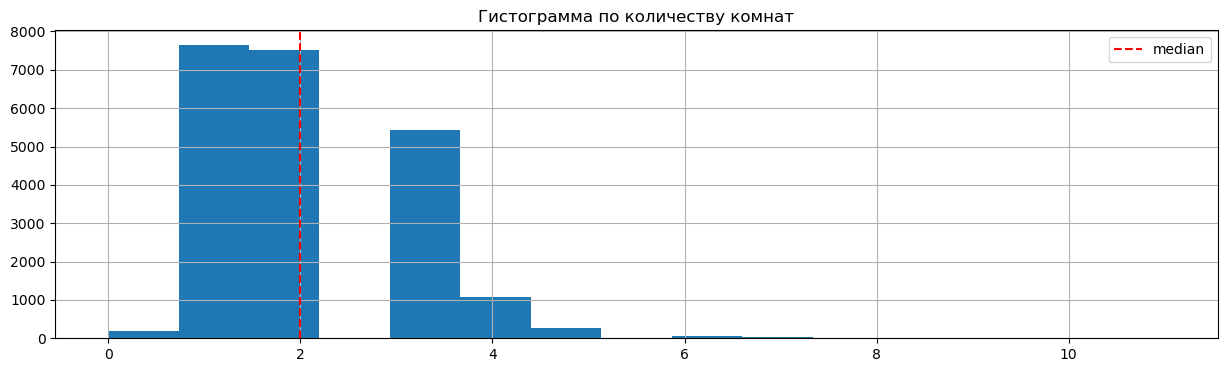

In [60]:
show_hist(data['rooms'],15, 'Гистограмма по количеству комнат',(15,4))

In [61]:
# Значения параметров объектов недвижимости на разных квантилях
show_quantile (data, 'rooms')

,rooms
0.001200,0.00
0.010000,1.00
0.500000,2.00
0.990000,5.00
0.998800,7.00


Отфильтруем данные, оставив в наборе данных квартиры с не более чем 7 комнатами.

In [62]:
data = data.query('rooms<=7 or rooms.isnull()')

In [63]:
data['rooms'].describe()

count   22,213.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max          7.0
Name: rooms, dtype: float64

In [64]:
data['rooms'].value_counts()

1    7649
2    7516
3    5444
4    1070
5     256
0     180
6      69
7      29
Name: rooms, dtype: int64

Пропусков нет, аномальные данные отфильтрованы. Продолжаем.

### floors_total

**floors_total — всего этажей в доме**

In [65]:
data['floors_total'].isna().sum()

79

Мы не можем предположить какая этажность у дома. И так как пропусков в наборе данных всего 79, что составляет менее одного процента от общего объёма данных, то строки с пропуском в floors_total мы удалим.

In [66]:
data = data.dropna(subset=['floors_total']) 

In [67]:
data['floors_total'] = data['floors_total'].astype('int')

In [68]:
data['floors_total'].describe()

count   22,134.0
mean        10.8
std          6.6
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         60.0
Name: floors_total, dtype: float64

Максимальное значение 60 этажей выглядит аномально большим.

Согласно свободным данным:
ЖК Князь Александр Невский», построенный холдингом «РосСтройИнвест», на сегодняшний день является самым высоким жилым домом Санкт-Петербурга. Его высота составляет 126 м. Здание состоит из 37 этажей

Бизнес-центр «Лидер Тауэр». Адрес: площадь Конституции, д. 3/2. «Лидер Тауэр» представляет собой два восьмиэтажных корпуса, между которыми возвышается 42-этажная башня 

"Лахта-Центр" имеет высоту 87 этажей, но в эксплуатацию не введён, наличие квартир в продаже из этого объекта недвижимости маловероятно, но изучим подробнее.

In [69]:
data.query('floors_total>37')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,"3,800,000.0",45.5,2018-06-28T00:00:00,2,2.9,60,27.4,4,NaN,...,7.4,NaN,Кронштадт,"67,763.0","49,488.0",2.0,342.0,3.0,614.0,166.0
16731,9,"3,978,000.0",40.0,2018-09-24T00:00:00,1,2.6,52,10.5,18,NaN,...,14.0,NaN,Санкт-Петербург,"20,728.0","12,978.0",1.0,793.0,0.0,NaN,45.00000000000001


Данные первой строки - г. Кронштадт, он с малоэтажной застройкой, вероятно при заполнении указали вместо 6 - 60, во второй строке изменим данные, так как судя по цене в 3,9 миллиона это не квартира в "Лахта-центре". Оставим значение nan, так как не можем достоверно сказать какая этажность дома.

In [70]:
data.loc[data['floors_total'] == 60, 'floors_total'] = 6
data.loc[2253,'floors_total']

6

In [71]:
data.loc[data['floors_total'] == 52, 'floors_total'] = float('nan')
data = data.dropna(subset=['floors_total'])

In [72]:
data['floors_total'].describe()

count   22,133.0
mean        10.8
std          6.6
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         37.0
Name: floors_total, dtype: float64

Максимальное значение теперь правдоподобно. Пропуски удалены.

### floor

**floor — этаж**

In [73]:
data['floor'].describe()

count   22,133.0
mean         5.9
std          4.9
min          1.0
25%          2.0
50%          4.0
75%          8.0
max         33.0
Name: floor, dtype: float64

In [74]:
data['floor'].isna().sum()

0

Минимальное значение 1, максимальное 33, пропусков в данных нет. Переходим к следующему столбцу.

### ceiling_height

**ceiling_height — высота потолков (м)**

In [75]:
data['ceiling_height'].describe()

count   13,669.0
mean         2.7
std          0.9
min          1.0
25%          2.5
50%          2.6
75%          2.8
max         32.0
Name: ceiling_height, dtype: float64

Согласно найденным данным минимальной нормой в России считается высота потолка 2,4 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метра

Высота потолков на рынке новостроек Петербурга варьируется в среднем в диапазоне 2,6–3 м.

Источник (https://stone-floor.ru/stati/optimalnaya-visota-potolka#:~:text=%D0%A1%D0%B5%D0%B3%D0%BE%D0%B4%D0%BD%D1%8F%20%D0%BC%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9%20%D0%BD%D0%BE%D1%80%D0%BC%D0%BE%D0%B9%20%D0%B2%20%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8,%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%20%D0%BC%D0%BE%D0%B6%D0%B5%D1%82%20%D0%BF%D1%80%D0%B5%D0%B2%D1%8B%D1%88%D0%B0%D1%82%D1%8C%203%20%D0%BC%D0%B5%D1%82%D1%80%D0%B0.)

Допустим, что в Петербурге возможны потолки 8-9 метров (двух-уровневая квартира в "сталинке"). Согласно данным Циан квартиры с очень высокими потолками в Санкт-Петербурге есть, например:

https://spb.cian.ru/sale/flat/239016087/
В нескольких минутах ходьбы до Исаакиевского собора, в доме у Синего моста. На пятом этаже и мансарде выделен премиальный лот с балконом. К преимуществам квартиры относятся потолки высотой до 7 м

В наших данных минимальное - 1 метр, максимальное 32 метра. Вначале изучим данные где высота потолка меньше или равна 2 метрам. 

In [76]:
data.query('ceiling_height <= 2').sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,"6,000,000.0",55.0,2018-10-31T00:00:00,2,1.0,12.0,32.4,7,NaN,...,10.0,NaN,Санкт-Петербург,"33,053.0","14,217.0",2.0,293.0,2.0,289.0,13.0
5712,5,"1,500,000.0",42.8,2017-08-14T00:00:00,2,1.2,2.0,27.5,1,NaN,...,5.2,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,"4,100,000.0",40.0,2017-10-17T00:00:00,1,1.8,37.0,17.4,5,NaN,...,8.3,NaN,Санкт-Петербург,"18,732.0","20,444.0",0.0,NaN,3.0,80.0,71.0
552,11,"2,999,000.0",33.5,2017-03-30T00:00:00,1,2.0,15.0,17.5,6,NaN,...,6.5,NaN,Санкт-Петербург,"33,972.0","11,746.0",1.0,520.0,1.0,949.0,270.0
2572,4,"2,400,000.0",62.0,2018-12-27T00:00:00,3,2.0,5.0,40.0,4,NaN,...,6.0,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,
4212,1,"2,120,000.0",35.4,2017-12-18T00:00:00,1,2.0,18.0,16.6,9,NaN,...,8.8,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5850,9,"1,650,000.0",35.5,2018-05-29T00:00:00,1,2.0,5.0,NaN,5,NaN,...,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,"3,300,000.0",36.0,2017-06-18T00:00:00,1,2.0,17.0,15.2,12,NaN,...,10.1,0.0,посёлок Металлострой,"25,268.0","26,980.0",0.0,NaN,0.0,NaN,53.0
16446,6,"12,300,000.0",88.3,2019-03-12T00:00:00,3,2.0,5.0,63.9,2,NaN,...,12.0,NaN,Санкт-Петербург,"38,415.0","7,675.0",1.0,568.0,1.0,154.0,
19098,7,"2,700,000.0",56.0,2018-02-04T00:00:00,3,2.0,5.0,46.0,1,NaN,...,6.0,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0


Таких объектов всего 13, многие из которых расположены в Ленинградской области. Этажность домов в основном больше, чем 1 этаж, значит это преимущественно не частная застройка где можно было бы предположить ненормированную высоту потолка. 

Заменим данные меньше или равные 2 метрам на высоту 2.4 метра.

In [77]:
data.loc[data['ceiling_height']<=2,'ceiling_height'] = 2.4

In [78]:
data.sort_values(by='ceiling_height').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12755,2,"1,400,000.0",22.5,2017-09-21T00:00:00,1,2.2,2.0,18.0,2,NaN,...,4.5,1.0,село Копорье,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
17794,1,"2,300,000.0",58.6,2016-05-12T00:00:00,3,2.2,5.0,44.1,3,False,...,5.5,1.0,деревня Бегуницы,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
23498,7,"1,600,000.0",54.0,2016-12-26T00:00:00,2,2.3,1.0,33.0,1,False,...,3.5,0.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,281.0
5498,17,"2,200,000.0",56.0,2018-04-02T00:00:00,2,2.3,5.0,45.0,1,NaN,...,9.0,2.0,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,55.0
1582,4,"4,100,000.0",45.6,2016-01-13T00:00:00,2,2.3,9.0,28.4,8,False,...,7.0,2.0,Санкт-Петербург,"49,152.0","14,977.0",1.0,489.0,1.0,525.0,329.0
17762,20,"2,300,000.0",54.3,2018-06-28T00:00:00,3,2.3,5.0,39.0,2,NaN,...,5.3,1.0,деревня Бегуницы,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
227,13,"2,200,000.0",47.0,2018-01-12T00:00:00,3,2.3,5.0,NaN,1,NaN,...,NaN,NaN,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
21349,3,"4,100,000.0",39.0,2017-12-04T00:00:00,1,2.4,4.0,NaN,2,NaN,...,NaN,1.0,Пушкин,"14,456.0","26,610.0",2.0,288.0,0.0,NaN,353.00000000000006
5850,9,"1,650,000.0",35.5,2018-05-29T00:00:00,1,2.4,5.0,NaN,5,NaN,...,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
21401,17,"4,600,000.0",39.0,2019-04-28T00:00:00,2,2.4,9.0,23.8,8,NaN,...,7.4,NaN,Санкт-Петербург,"12,384.0","12,296.0",0.0,NaN,1.0,396.0,


Теперь изучим данные с высотой потолков более 7 метров.

In [79]:
data.query('ceiling_height > 7').sort_values(by='ceiling_height', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3148,14,"2,900,000.0",75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,
22336,19,"9,999,000.0",92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,"18,838.0","3,506.0",0.0,NaN,3.0,511.0,
22938,14,"4,000,000.0",98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
4876,7,"3,000,000.0",25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5807,17,"8,150,000.0",80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,"18,732.0","20,444.0",0.0,NaN,3.0,80.0,38.0
20478,11,"8,000,000.0",45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,NaN,...,10.0,1.0,Санкт-Петербург,"18,975.0","3,246.0",0.0,NaN,3.0,449.0,429.0
17857,1,"3,900,000.0",56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,...,NaN,NaN,Санкт-Петербург,"41,030.0","15,543.0",0.0,NaN,0.0,NaN,73.0
10773,8,"3,800,000.0",58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,...,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0
5669,4,"4,400,000.0",50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,"28,981.0","10,912.0",1.0,305.0,0.0,NaN,267.0
18545,6,"3,750,000.0",43.0,2019-03-18T00:00:00,2,25.0,5.0,29.0,3,False,...,NaN,NaN,Санкт-Петербург,"27,054.0","8,033.0",1.0,540.0,0.0,NaN,12.000000000000002


In [80]:
data.loc[data['ceiling_height']>7, 'ceiling_height'].count()

21

Таких объектов 21. Предположу что допущена ошибка и вместо метров данные указаны в дециметрах. Исправим данные.

In [81]:
data.query('ceiling_height > 7').sort_values(by='ceiling_height', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3148,14,"2,900,000.0",75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,
22336,19,"9,999,000.0",92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,"18,838.0","3,506.0",0.0,NaN,3.0,511.0,
22938,14,"4,000,000.0",98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
4876,7,"3,000,000.0",25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5807,17,"8,150,000.0",80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,"18,732.0","20,444.0",0.0,NaN,3.0,80.0,38.0


In [82]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = \
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10

In [83]:
data.query('ceiling_height > 7').sort_values(by='ceiling_height', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,"5,600,000.0",56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,NaN,...,9.1,2.0,Санкт-Петербург,"14,814.0","13,610.0",0.0,NaN,0.0,NaN,315.0
22309,20,"5,300,000.0",45.0,2017-09-30T00:00:00,1,10.3,16.0,15.5,15,NaN,...,NaN,NaN,Санкт-Петербург,"36,353.0","11,936.0",2.0,440.0,2.0,450.0,136.0
5863,20,"5,650,000.0",45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,NaN,...,8.3,1.0,Санкт-Петербург,"13,069.0","10,763.0",0.0,NaN,1.0,613.0,14.0
3474,3,"1,400,000.0",30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
15743,14,"5,600,000.0",67.0,2016-11-11T00:00:00,3,8.0,16.0,41.0,1,NaN,...,8.0,NaN,Санкт-Петербург,"32,691.0","11,035.0",1.0,723.0,0.0,NaN,474.0


Осталось ещё 5 неправдоподобно больших значения больше 7 метров. Судя по цене до 6 миллионов рублей, это врятли двухуровневые квартиры. Заменим значения по высте полотка на среднее значение 2,6 метра.

In [84]:
data.loc[data['ceiling_height']> 7,'ceiling_height'] = 2.6

In [85]:
#check
data.loc[15061, 'ceiling_height']

2.6

In [86]:
#check
data.query('ceiling_height > 7').sort_values(by='ceiling_height', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [87]:
data['ceiling_height'].describe()

count   13,669.0
mean         2.7
std          0.3
min          2.0
25%          2.5
50%          2.6
75%          2.8
max          5.3
Name: ceiling_height, dtype: float64

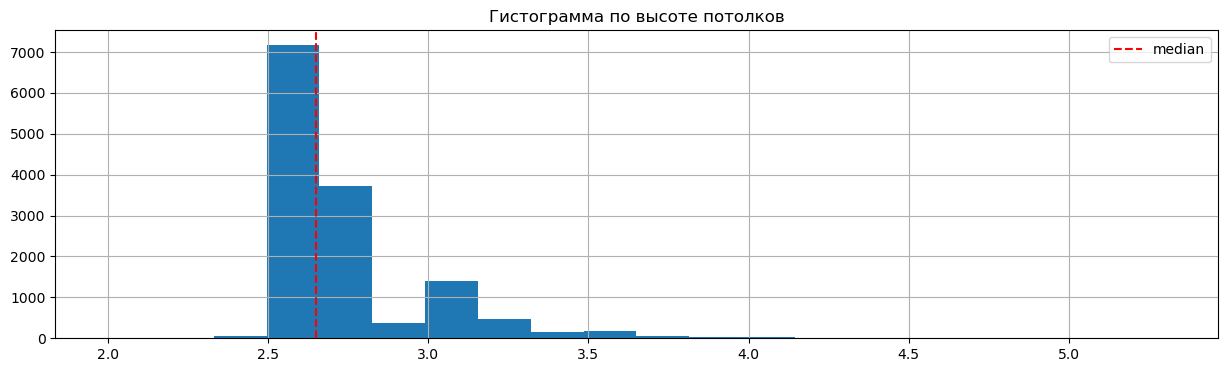

In [88]:
show_hist(data['ceiling_height'],20, 'Гистограмма по высоте потолков',(15,4))

In [89]:
data['ceiling_height'].isna().sum()

8464

**Заполним пропуски медианным значением с группировкой по населённому пункту.**

In [90]:
data['ceiling_height'] = \
data['ceiling_height'].fillna (data.groupby('locality_name')['ceiling_height'].transform('median'))

In [91]:
data['ceiling_height'].isna().sum()

151

оставшиеся пропуски заполним медианой по всем значениям без группировок

In [92]:
data['ceiling_height'].median()

2.7

In [93]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [94]:
data['ceiling_height'].isna().sum()

0

### is_apartment

**is_apartment — апартаменты (булев тип)**

In [95]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [96]:
data.loc[data['is_apartment'] == True, 'is_apartment'].count()

41

In [97]:
data.loc[data['is_apartment'] == False, 'is_apartment'].count()

2596

Можно предположить что если квартира не является апартаментами, то при заполнении данных эту графу просто пропускали, а если является, то заполняли 'True'. Соответственно "nan" встречается там, где квартира НЕ является апартаментами. Но тогда в наборе данных только 41 квартира -  апартаменты, что кажется очень маленьким значением, а этот параметр важен, так как от типа недвижимости сильно зависит цена. 

In [98]:
data.loc[data['is_apartment'].isna()].head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,2.6,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,2.7,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,2.6,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0


Так как других "зацепок" из данных датафрейма, на основании котрых можно предположить является ли квартира апартаментами или нет, нет. То заполним данные согласно описанному выше предположению.

In [99]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [100]:
data.loc[data['is_apartment'] == False, 'is_apartment'].count()

22092

In [101]:
data['is_apartment'].isna().sum()

0

In [102]:
data['is_apartment'].value_counts()

False    22092
True        41
Name: is_apartment, dtype: int64

Пропуски устранены, 41 первоначальных значения True сохранены

### studio

**studio - квартира-студия (булев тип)**

In [103]:
data['studio'].unique()

array([False,  True])

In [104]:
data['studio'].isna().sum()

0

Пропусков в данных нет,

Проверим во всех ли строках, где количество комнат == 0 указано что это квартира-студия и наоборот, во всех ли квартирах, где указано что это студия, количество комнат ==0

In [105]:
data.loc[(data['studio']==True) & (data['rooms'] !=0), 'rooms'].count()

10

In [106]:
data.loc[(data['studio']==True) & (data['rooms'] !=0)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2389,5,"2,250,000.0",25.4,2016-06-07T00:00:00,1,2.7,12.0,17.1,8,False,...,NaN,2.0,Санкт-Петербург,"14,125.0","12,921.0",2.0,328.0,2.0,485.0,26.0
3187,13,"3,800,000.0",27.0,2016-05-17T00:00:00,1,2.7,14.0,18.0,8,False,...,NaN,2.0,Санкт-Петербург,"50,348.0","16,053.0",0.0,NaN,0.0,NaN,45.00000000000001
4180,4,"4,500,000.0",34.0,2016-04-25T00:00:00,1,2.8,10.0,21.0,10,False,...,NaN,2.0,Санкт-Петербург,"23,609.0","5,299.0",0.0,NaN,1.0,433.0,62.0
8683,10,"3,500,000.0",32.5,2016-05-05T00:00:00,1,3.0,23.0,29.9,11,False,...,NaN,2.0,Санкт-Петербург,"34,967.0","14,640.0",0.0,NaN,1.0,564.0,45.00000000000001
11026,1,"2,800,000.0",28.0,2016-05-04T00:00:00,1,2.6,26.0,19.0,6,False,...,NaN,2.0,посёлок Парголово,"53,511.0","19,687.0",0.0,NaN,0.0,NaN,45.00000000000001


In [107]:
data.loc[(data['studio']==True) & (data['rooms'] !=0)].value_counts('rooms')

rooms
1    10
dtype: int64

Имеется 10 строк, в которых указано, что это квартира-студия, но количество комнат 1, вместо 0

Изменим эти данные. Примем допущение, что указали ошибочно вместо 0 значение 1, заменим все значения по условию на 0

In [108]:
data.loc[(data['studio'] == True) & (data['rooms'] != 0), 'rooms'] = (
    data.loc[(data['studio'] == True) & (data['rooms'] != 0), 'rooms'] - 1)

In [109]:
data.loc[(data['studio']==True) & (data['rooms'] !=0), 'rooms'].count()

0

Теперь рассмотрим строки, где указано количество комнат 0, но тип квартиры не студия.

In [110]:
data.loc[(data['studio']==False) & (data['rooms'] ==0), 'rooms'].count()

50

In [111]:
data.query('studio==False and rooms ==0').sort_values(by='total_area').tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23592,10,"1,450,000.0",29.0,2017-11-11T00:00:00,0,2.6,9.0,18.0,8,False,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0
7286,6,"2,580,000.0",30.0,2018-02-07T00:00:00,0,2.6,18.0,19.0,2,False,...,NaN,NaN,посёлок Парголово,"52,610.0","18,787.0",0.0,NaN,0.0,NaN,41.0
19735,1,"2,800,000.0",30.5,2017-10-10T00:00:00,0,2.8,25.0,20.0,2,False,...,NaN,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,13.0
6805,7,"1,850,000.0",31.0,2017-11-10T00:00:00,0,2.6,18.0,18.0,10,False,...,NaN,1.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,7.0
17805,17,"2,600,000.0",31.1,2017-10-25T00:00:00,0,2.7,16.0,21.4,14,False,...,NaN,2.0,Санкт-Петербург,"19,212.0","22,637.0",0.0,NaN,1.0,457.0,44.00000000000001
7008,4,"5,200,000.0",32.3,2017-09-14T00:00:00,0,2.7,11.0,25.5,4,False,...,NaN,NaN,Санкт-Петербург,"30,824.0","6,469.0",1.0,756.0,1.0,936.0,86.0
21628,9,"3,900,000.0",34.0,2017-03-18T00:00:00,0,2.7,20.0,24.0,10,False,...,NaN,2.0,Санкт-Петербург,"15,506.0","13,615.0",0.0,NaN,1.0,767.0,320.0
4683,2,"3,650,000.0",35.0,2018-02-01T00:00:00,0,2.7,25.0,23.4,25,False,...,NaN,NaN,Санкт-Петербург,"43,431.0","12,188.0",0.0,NaN,0.0,NaN,100.0
839,14,"1,900,000.0",35.0,2017-04-14T00:00:00,0,2.7,5.0,15.0,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
7237,8,"2,999,000.0",42.6,2017-11-27T00:00:00,0,2.8,16.0,25.7,2,False,...,NaN,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001


Имеется 50 строк с противоречивыми данными. Изменим эти данные по условию, что если количество комнат 0, то тип квартиры - студия. 

In [112]:
data.loc[(data['studio']==False) & (data['rooms'] ==0), 'studio'] = True

In [113]:
data.loc[(data['studio']==False) & (data['rooms'] ==0), 'rooms'].count()

0

Данные обработали, пропуски как рассмотрели выше, нет. Переходим к следующему столбцу.

### open_plan

**open_plan — свободная планировка (булев тип)**

In [114]:
data['open_plan'].unique()

array([False,  True])

In [115]:
data['open_plan'].value_counts()

False    22077
True        56
Name: open_plan, dtype: int64

In [116]:
data['open_plan'].isna().sum()

0

### kitchen_area

**•	kitchen_area — площадь кухни в квадратных метрах (м²)**

In [117]:
data['kitchen_area'].describe()

count   20,127.0
mean        10.3
std          5.1
min          1.3
25%          7.0
50%          9.0
75%         11.9
max        100.7
Name: kitchen_area, dtype: float64

Требуется рассмотреть как минимальные, так и максимальные значения.

Так как в строительных, санитарных и прочих нормах, которые регламентируются СНиП, СП, СанПин. В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м². Так как в законодательстве нет понятия "квартира-студия", а только "однокомнатная квартира", то по определению даже в студиях кухонная зона не дожна быть меньше 5 квадратных метров. (Источник: https://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php)

In [118]:
data.sort_values(by='kitchen_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2489,9,"12,500,000.0",255.0,2017-04-21T00:00:00,3,2.7,2.0,153.9,2,False,...,100.7,0.0,Санкт-Петербург,"29,544.0","6,916.0",0.0,NaN,3.0,198.0,102.0
6193,19,"24,300,000.0",230.0,2016-06-03T00:00:00,4,2.7,3.0,90.0,2,False,...,70.0,0.0,Санкт-Петербург,"39,422.0","15,354.0",0.0,NaN,1.0,345.0,397.0
18447,17,"21,800,000.0",187.0,2018-01-14T00:00:00,5,2.7,4.0,120.0,4,False,...,65.0,NaN,Санкт-Петербург,"43,758.0","15,461.0",1.0,756.0,2.0,278.0,
22980,19,"24,500,000.0",155.4,2017-10-10T00:00:00,3,3.0,4.0,72.0,2,False,...,65.0,NaN,Санкт-Петербург,"43,758.0","15,461.0",1.0,756.0,2.0,278.0,325.0
15780,9,"12,990,000.0",119.6,2017-03-13T00:00:00,3,3.0,5.0,36.4,4,False,...,64.0,4.0,Пушкин,"18,616.0","30,770.0",1.0,569.0,0.0,NaN,
19499,10,"8,000,000.0",118.0,2017-08-31T00:00:00,3,3.0,5.0,36.0,4,False,...,64.0,4.0,Пушкин,"18,616.0","30,770.0",1.0,569.0,0.0,NaN,7.0
14900,20,"25,900,000.0",125.6,2018-08-14T00:00:00,2,4.0,4.0,42.7,4,False,...,62.5,2.0,Пушкин,"13,426.0","25,580.0",0.0,NaN,0.0,NaN,194.00000000000003
3561,5,"12,300,000.0",115.0,2017-08-09T00:00:00,3,2.7,20.0,45.0,16,False,...,60.0,1.0,Санкт-Петербург,"33,386.0","14,234.0",0.0,NaN,0.0,NaN,63.0
20871,19,"21,500,000.0",140.0,2018-10-01T00:00:00,4,3.0,4.0,70.0,3,False,...,58.0,NaN,Санкт-Петербург,"38,332.0","13,229.0",0.0,NaN,1.0,840.0,
4320,20,"19,700,000.0",146.3,2017-02-10T00:00:00,3,3.4,6.0,55.8,6,False,...,56.2,NaN,Санкт-Петербург,"23,312.0","2,450.0",1.0,548.0,3.0,883.0,638.0


большие значения выглядят правдоподобно, так как общая площадь квартиры так же большая. Проверим минимальные.

In [119]:
data.sort_values(by='kitchen_area').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20217,7,"4,250,000.0",28.5,2019-05-01T00:00:00,1,2.8,14.0,19.5,10,False,...,1.3,NaN,Санкт-Петербург,"37,199.0","12,721.0",0.0,NaN,0.0,NaN,
9138,17,"2,920,000.0",23.3,2018-12-12T00:00:00,1,2.7,3.0,21.0,1,False,...,2.0,NaN,Санкт-Петербург,"19,506.0","4,008.0",0.0,NaN,2.0,45.0,107.0
16367,2,"2,720,000.0",25.7,2017-10-30T00:00:00,1,2.7,19.0,22.6,11,False,...,2.0,NaN,Санкт-Петербург,"14,472.0","13,268.0",0.0,NaN,0.0,NaN,109.0
19642,5,"1,190,000.0",14.0,2018-07-29T00:00:00,1,2.7,5.0,11.0,1,False,...,2.0,NaN,Санкт-Петербург,"9,898.0","11,122.0",0.0,NaN,0.0,NaN,4.0
11033,6,"5,350,000.0",32.0,2016-04-20T00:00:00,1,2.7,14.0,16.0,10,False,...,2.0,0.0,Санкт-Петербург,"19,008.0","3,953.0",0.0,NaN,1.0,69.0,210.0
21419,4,"1,870,000.0",20.0,2018-03-06T00:00:00,1,2.5,5.0,14.0,1,False,...,2.0,NaN,Санкт-Петербург,"16,652.0","15,654.0",1.0,619.0,1.0,937.0,45.00000000000001
906,15,"2,600,000.0",27.0,2017-07-10T00:00:00,1,2.8,23.0,18.0,18,False,...,2.0,0.0,Санкт-Петербург,"22,131.0","17,459.0",0.0,NaN,1.0,411.0,10.0
6262,9,"3,100,000.0",24.0,2018-06-25T00:00:00,2,3.0,5.0,16.0,5,False,...,2.0,NaN,Санкт-Петербург,"31,960.0","4,914.0",2.0,426.0,1.0,936.0,54.0
17834,5,"2,940,000.0",34.7,2017-10-09T00:00:00,1,2.7,26.0,15.5,14,False,...,2.3,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,318.0
8729,9,"2,200,000.0",18.4,2018-08-20T00:00:00,1,2.5,3.0,14.0,3,False,...,2.4,NaN,Пушкин,"20,710.0","30,687.0",0.0,NaN,1.0,155.0,59.0


In [120]:
data.loc[data['kitchen_area'] <5, 'kitchen_area'].count()

99

Минимальные значения безусловно имеют место быть. Современные квартиры студии часто не отличаются большой площадью, и продавцы указывают фактически сколько отведено для кухни места в квартире. Однако по документам, на генеральном плане под кухню будет отведено не менее 5 квадратных метров, из этого считается и официальная жилая площадь квартиры.

In [121]:
# Значения параметров объектов недвижимости на разных квантилях
show_quantile (data, 'kitchen_area')

,kitchen_area
0.001200,3.72
0.010000,5.00
0.500000,9.00
0.990000,31.67
0.998800,46.97


Квантили распредеделения данных:

- 3.7 квадратных метров площади кухни - значение, ниже которого находится 0.12% значений выборки
- 5 кв.м - значение, ниже которого находится 1% значений выборки
- 9 кв.м - медиана, значение, ниже которого находится 50% значений выборки
- 31 кв.м - значение, ниже которого находится 99% значений выборки
- 46 кв.м - значение, ниже которого находится 99.88% значений выборки

In [122]:
data['kitchen_area'].isna().sum()

2006

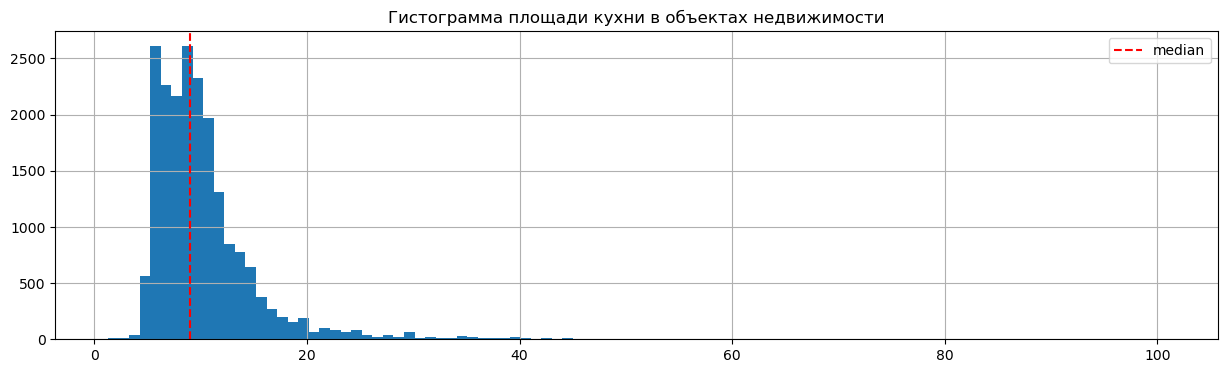

In [123]:
show_hist(data['kitchen_area'],100, 'Гистограмма площади кухни в объектах недвижимости',(15,4))

По аналогии заполнения пропущенных значений столбца с жилой площадью, пропуски оставляем без изменений. Избавимся от аномально больших и маленьких значений. **Для дальнейшего анализа отфильтруем данные с площадью кухни менее 45 метров и более, или равное 4**

In [124]:
data = data.query('kitchen_area < 45 and kitchen_area >=4 or kitchen_area.isnull()')

In [125]:
#check
data['kitchen_area'].isna().sum()

2006

### balcony

**balcony — число балконов**

In [126]:
data['balcony'].describe()

count   11,271.0
mean         1.2
std          1.1
min          0.0
25%          0.0
50%          1.0
75%          2.0
max          5.0
Name: balcony, dtype: float64

Пять балконов в квартире  - это довольно много. В квартирах с очень большой площадью такое конечно вполне может быть и подходящих квартир в наборе данных достаточно, однако проверим встречаются ли 5 балконов в квартирах, где комнат меньше 3, а также жилая площадь меньше 45 метров.

Условие выбрано из расчёта, что в каждой жилой комнате (в среднем по 15 м.) есть балкон, плюс два на кухне-гостинной (или два в большой угловой спальне с двумя окнами). 

In [127]:
data.query('balcony==5 and rooms<3 and living_area<45').sort_values(by='total_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10267,5,"23,169,000.0",94.9,2017-11-26T00:00:00,2,2.7,9.0,29.7,9,False,...,29.0,5.0,Санкт-Петербург,"25,492.0","6,590.0",1.0,561.0,0.0,NaN,90.00000000000001
9778,50,"11,000,000.0",87.0,2017-10-25T00:00:00,2,2.7,25.0,32.5,11,False,...,31.0,5.0,Санкт-Петербург,"9,586.0","11,649.0",0.0,NaN,0.0,NaN,3.0000000000000004
8162,19,"21,990,000.0",84.0,2018-08-01T00:00:00,2,3.0,24.0,33.0,23,False,...,18.0,5.0,Санкт-Петербург,"11,819.0","13,265.0",0.0,NaN,0.0,NaN,
15322,11,"6,280,000.0",83.0,2016-04-21T00:00:00,2,3.0,4.0,41.0,2,False,...,14.5,5.0,Сестрорецк,"54,328.0","35,334.0",0.0,NaN,0.0,NaN,60.0
1350,10,"6,900,000.0",81.2,2017-08-29T00:00:00,2,2.8,22.0,41.0,5,False,...,16.4,5.0,Санкт-Петербург,"36,410.0","14,528.0",0.0,NaN,0.0,NaN,360.00000000000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,10,"3,600,000.0",41.0,2018-03-13T00:00:00,2,2.5,16.0,24.5,5,False,...,6.0,5.0,Санкт-Петербург,"29,193.0","6,565.0",1.0,645.0,1.0,579.0,13.0
7113,16,"4,725,000.0",40.4,2017-11-10T00:00:00,1,2.7,15.0,18.8,6,False,...,11.2,5.0,Санкт-Петербург,"18,119.0","13,347.0",0.0,NaN,0.0,NaN,74.0
20888,4,"3,200,000.0",37.0,2017-11-26T00:00:00,1,2.8,14.0,16.0,5,False,...,11.0,5.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,22.000000000000004
13648,8,"3,300,000.0",35.0,2018-09-21T00:00:00,1,2.7,16.0,15.0,14,False,...,9.0,5.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,162.0


89 строк, при этом даже среди квартир площадью меньше 40 метров указано количество балконов - 5. Предполагаю что продавцы могут ошибочно заполнять данные о балконах и вместо их количества указывать метраж. 5 квадратных метров вполне стандартный просторный балкон в современных новостройках.

In [128]:
data.loc[(data['balcony']==5) & (data['rooms']<3) & (data['living_area']<45), 'balcony'] = 1

In [129]:
data['balcony'].value_counts()

1.0    3993
2.0    3447
0.0    3397
5.0     199
4.0     164
3.0      71
Name: balcony, dtype: int64

In [130]:
data.query('balcony==5').sort_values(by='living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15248,7,"6,000,000.0",59.0,2019-02-14T00:00:00,3,2.7,10.0,29.0,2,False,...,16.0,5.0,Санкт-Петербург,"36,280.0","13,195.0",1.0,575.0,2.0,606.0,28.0
8311,9,"3,700,000.0",64.0,2019-04-28T00:00:00,3,2.6,7.0,36.0,4,False,...,9.5,5.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,
2436,12,"6,958,000.0",75.4,2017-08-13T00:00:00,3,2.7,25.0,36.5,24,False,...,13.6,5.0,Санкт-Петербург,"18,648.0","16,069.0",0.0,NaN,0.0,NaN,19.0
13336,13,"4,150,000.0",64.0,2019-03-18T00:00:00,3,2.8,14.0,36.8,7,False,...,8.0,5.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,
7025,20,"5,500,000.0",68.0,2014-12-28T00:00:00,3,2.5,14.0,37.0,6,False,...,8.3,5.0,Колпино,"25,355.0","31,141.0",0.0,NaN,0.0,NaN,979.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18524,11,"8,300,000.0",85.0,2017-08-11T00:00:00,3,2.7,25.0,NaN,15,False,...,10.0,5.0,Санкт-Петербург,"17,520.0","16,316.0",0.0,NaN,1.0,104.0,59.0
18912,17,"10,626,000.0",84.1,2018-06-05T00:00:00,2,2.8,20.0,NaN,10,False,...,14.9,5.0,Санкт-Петербург,"39,106.0","10,330.0",2.0,386.0,3.0,94.0,151.0
19826,6,"9,349,988.0",81.3,2018-07-24T00:00:00,3,3.0,4.0,NaN,2,False,...,12.7,5.0,Санкт-Петербург,"44,870.0","20,802.0",0.0,NaN,1.0,792.0,
22332,6,"5,830,583.0",52.2,2018-12-30T00:00:00,1,3.0,4.0,NaN,3,False,...,11.9,5.0,Санкт-Петербург,"44,870.0","20,802.0",0.0,NaN,1.0,792.0,60.0


Требуемые данные изменились. Наличие 5-ти балконов в 3-х комнатной квартире, с жилой площадью 29 метров конечно сложно представить, но в теории это возможно, особенно учитывая площадь кухни - 16 метров, это вполне может быть угловая кухня-гостинная с двумя окнами и двумя балконами соответственно.

Проверим наличие пропусков, изучим их.

In [131]:
data['balcony'].isna().sum()

10795

In [132]:
data.loc[data['balcony'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,False,...,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,False,...,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,2.6,12.0,14.4,5,False,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,"2,900,000.0",33.2,2018-05-23T00:00:00,1,2.7,27.0,15.4,26,False,...,8.8,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
10,5,"5,050,000.0",39.6,2017-11-16T00:00:00,1,2.7,12.0,20.3,3,False,...,8.5,NaN,Санкт-Петербург,"38,357.0","13,878.0",1.0,310.0,2.0,553.0,137.0


Странно, что в 3-х и 2-х комнатных квартирах с большой площадью нет балкона, но восстановить данные точно мы не можем, поэтому будем считать что эту графу просто не заполняли в случае если в квартире балкона нет. Заполним пропуски нулями.

In [133]:
data['balcony'] = data['balcony'].fillna(0)

In [134]:
data['balcony'].isna().sum()

0

### locality_name

**locality_name — название населённого пункта**

In [135]:
data['locality_name'].describe()

count               22019
unique                361
top       Санкт-Петербург
freq                14557
Name: locality_name, dtype: object

361 уникальное значение, самое распространенное - Санкт-Петербург. Изучим пропуски в данных.

In [136]:
data['locality_name'].isna().sum()

47

In [137]:
data.loc[data['locality_name'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,"8,600,000.0",81.7,2016-04-15T00:00:00,3,3.5,5.0,50.8,2,False,...,8.8,0.0,NaN,"23,478.0","4,258.0",0.0,NaN,0.0,NaN,147.0
2033,6,"5,398,000.0",80.0,2017-05-30T00:00:00,3,2.7,4.0,42.6,2,False,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,"3,351,765.0",42.7,2015-09-20T00:00:00,1,2.7,24.0,15.6,3,False,...,10.7,0.0,NaN,"22,041.0","17,369.0",0.0,NaN,1.0,374.0,276.0
2632,2,"5,130,593.0",62.4,2015-10-11T00:00:00,2,2.7,24.0,33.1,21,False,...,8.2,0.0,NaN,"22,041.0","17,369.0",0.0,NaN,1.0,374.0,256.0
3574,10,"4,200,000.0",46.5,2016-05-28T00:00:00,2,2.7,5.0,30.8,5,False,...,6.5,0.0,NaN,"27,419.0","8,127.0",0.0,NaN,1.0,603.0,45.00000000000001
4151,17,"17,600,000.0",89.5,2014-12-09T00:00:00,2,3.0,8.0,39.6,7,False,...,13.4,0.0,NaN,"25,054.0","3,902.0",1.0,485.0,3.0,722.0,869.0
4189,7,"9,200,000.0",80.0,2015-12-10T00:00:00,3,4.0,4.0,52.3,3,False,...,10.4,0.0,NaN,"21,774.0","3,039.0",1.0,690.0,1.0,953.0,223.0
4670,1,"5,500,000.0",83.0,2015-08-14T00:00:00,3,2.7,7.0,NaN,6,False,...,NaN,0.0,NaN,"26,534.0","5,382.0",1.0,446.0,1.0,376.0,350.00000000000006
5343,19,"13,540,000.0",85.5,2016-01-20T00:00:00,3,2.7,7.0,59.1,5,False,...,8.3,4.0,NaN,"10,556.0","9,538.0",1.0,67.0,0.0,NaN,303.0
5707,7,"3,700,000.0",30.0,2016-04-29T00:00:00,1,2.7,24.0,20.0,23,False,...,NaN,0.0,NaN,"21,460.0","16,788.0",0.0,NaN,1.0,170.0,49.0


Объявления о продаже квартиры без указания где квартира расположена сложно представить, но они есть.

В теории, используя данные об отдалённости от аэропорта и расстояния до центра города можно предположить к каком районе находится объёкт недвижимости. Однако, пропусков в данных о месторасположении только 47, что составляет около 0.2% от общего количества данных. Отсутствие данных значительного влиятия на ход исследования не окажет. Заполним пропуски фразой "Нет данных"

In [138]:
data['locality_name'] = data['locality_name'].fillna('Нет данных')

In [139]:
data['locality_name'].isna().sum()

0

In [140]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Иванго

Визуально просмотрев уникальные значения видны дубликаты, такие как:

"Мурино" - "посёлок Мурино", 

"посёлок Пансионат Зелёный Бор" - "поселок Пансионат Зелёный Бор", 

"поселок Тельмана" и "посёлок Тельмана",

"поселок Рябово" и "поселок городского типа Рябово",  

и другие похожие случаи.

Приведём все значения в нижний регистр и вновь проверим уникальные значения.

In [141]:
data['locality_name'] = data['locality_name'].str.lower() 

In [142]:
len(np.unique(data['locality_name']))

362

Ничего не измеилось, значит будем обрабатывать значения подробнее.

Создадим функцию, которая возвращает название населённого пункта для строк, содержащих уникальную часть его названия. Далее применим эту функцию к новому столбцу датафрейма.

Логика выбора названий населённых пунктов для функции такова:
город Санкт-Петербург, как город федерального значения
города - районные центры Ленинградской области
далее - наиболее активно застраивающиеся пригороды Санкт-Петербурга

остальные названия населённых пунктов - остаются без изменений.

Функция достаточно объёмна, но при условии, что вероятно ещё понадобится обрабатывать похожие наборы данных, она пригодится.

In [143]:
def name_location(name):
    location_dict = {
        'санкт': 'г. Санкт-Петербург',
        'кировск': 'г. Кировск',
        'выборг': 'г. Выборг',
        'луга': 'г. Луга',
        'кириши': 'г. Кириши',
        'волосово': 'г. Волосово',
        'тосно': 'г. Тосно',
        'гатчина': 'г. Гатчина',
        'подпорожье': 'г. Подпорожье',
        'лодейное поле': 'г. Лодейное поле',
        'приозерск': 'г. Приозерск',
        'кингисепп': ' г. Кингисепп',
        'луга': ' г. Луга',
        'волхов': 'г. Волхов',
        'бокситогорск': 'г. Бокситогорск',
        'тихвин': 'г. Тихвин',
        'всеволожск': 'г. Всеволожск',
        'сланцы': ' г. Сланцы',
        'ломоносов': 'г. Ломоносов',
        'шушар': 'пос. Шушары',
        'паргол': 'пос. Парголово',
        'мурино': 'г. Мурино',
        'кронштадт': 'г. Кронштадт',
        'колпино': 'г. Колпино',
        'коммунар': 'г. Коммунар',
        'кудрово': 'г. Кудрово',
        'пушкин': 'г. Пушкин',
        'петергоф': 'г. Петергоф',
        'сертолово': 'пос. Сертолово',
        'шлиссербург': 'г. Шлиссельбург',
        'ивангород': 'г. Ивангород',
        'красное село': 'г. Красное село',
        'аннино': 'пос Аннино',
        'сестрорецк': 'г. Сестрорецк',
        'павловск': 'г. Павловск',
        'кузьмоловский': 'пгт. Кузьмоловский',
        'металлострой': 'пос. Металлострой',
        'новое девяткино': 'дер. Новое Девяткино',
        'шлиссельбург': 'г. Шлиссельбург',
        'зеленогорск': 'г. Зеленогорск',
        'сосновый бор': 'г. Сосновый Бор',
        'бугры': 'пос. Бугры',
        'колтуши': 'дер. Колшуши',
        'кузьмолово': 'дер. Кузьмолово',
        'агалатово': 'дер. Агалатово',
        'сясьстрой': 'г. Сясьстрой',
        'приморск': 'г. Приморск',
        'тельмана': 'пос. Тельмана',
        'рощино': 'пос. Рощино',
        'каменногорск': 'г. Каменногорск',
        'лаврики': 'дер. Лаврики',
        'вырица': 'пгт. Вырица',
        'юкки': 'дер. Юкки',
        'токсово': 'пгт. Токсово',
        'пансионат зелёный бор': 'пос. Пансионат Зелёный Бор',
        'высоцк': 'г. Высоцк',
        'любань':'г. Любань',
        'отрадное':'г. Отрадное',
        'никольское':'г. Никольское',
        'лесогорский':'пгт. Лесогорский',
        'назия':'пгт. Назия',
        'светогорск':'г. Светогорск',
        'новая ладога':'г. Новая Ладога',
        'пикал':'г. Пикалёво'
    }
    return location_dict.get(name, name)


In [144]:
name_location('волосово')

'г. Волосово'

In [145]:
name_location('никольское')

'г. Никольское'

Создадим новый столбец  new_locality_name и с помощью метода apply заполним его новыми названиями в соответствии с условиями функции name_location.

In [146]:
data['new_locality_name'] = data['locality_name'].apply(name_location)

Новый столбец создан, для удобства приведём названия населённый пунктов в нижний регистр.

In [147]:
data['new_locality_name'] = data['new_locality_name'].str.lower()

In [148]:
data.new_locality_name.value_counts().head(40)

санкт-петербург              14557
посёлок мурино                 501
посёлок шушары                 416
г. всеволожск                  383
г. пушкин                      340
посёлок парголово              315
г. колпино                     295
г. гатчина                     292
деревня кудрово                281
г. выборг                      231
г. петергоф                    195
г. сестрорецк                  177
г. кудрово                     168
г. красное село                165
деревня новое девяткино        138
пос. сертолово                 136
г. кириши                      119
г. ломоносов                   115
 г. сланцы                     107
г. волхов                      107
г. тосно                        98
 г. кингисепп                   96
г. никольское                   85
г. коммунар                     84
г. кронштадт                    83
г. сосновый бор                 81
г. кировск                      81
г. отрадное                     75
посёлок бугры       

### airports_nearest

**airports_nearest — расстояние до ближайшего аэропорта в метрах (м)**

In [149]:
data['airports_nearest'].describe()

count   16,823.0
mean    28,851.1
std     12,685.1
min      6,450.0
25%     18,500.0
50%     26,862.0
75%     37,407.0
max     84,869.0
Name: airports_nearest, dtype: float64

Минимальное значение 6 км, максимальное - 84 километра, вполне реально.

In [150]:
data['airports_nearest'].isna().sum()

5243

In [151]:
data.loc[data['airports_nearest'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,2.6,12.0,14.4,5,False,...,0.0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,городской посёлок янино-1
8,20,"2,900,000.0",33.2,2018-05-23T00:00:00,1,2.7,27.0,15.4,26,False,...,0.0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003,посёлок мурино
12,10,"3,890,000.0",54.0,2016-06-30T00:00:00,2,2.6,5.0,30.0,5,False,...,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.00000000000001,пос. сертолово
22,20,"5,000,000.0",58.0,2017-04-24T00:00:00,2,2.8,25.0,30.0,15,False,...,2.0,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,деревня кудрово
30,12,"2,200,000.0",32.8,2018-02-19T00:00:00,1,2.6,9.0,NaN,2,False,...,0.0,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,г. коммунар


Возможно аэропорт настолько далеко, что указывать эти данные посчитали неуместным. Оставим пропуски без изменений и перейдем к следующему столбцу.

### city_center, parks, ponds

**city_centers_nearest — расстояние до центра города (м)**

In [152]:
data['city_centers_nearest'].describe()

count   16,841.0
mean    14,275.7
std      8,495.2
min        208.0
25%      9,510.0
50%     13,164.0
75%     16,318.0
max     65,968.0
Name: city_centers_nearest, dtype: float64

Как минимальное, так и максимальное значения вполне вероятны, хотя информация, что до центра города 65 километров кажется малоприменимой, это возможно уже Ленинградская область.

In [153]:
data['city_centers_nearest'].isna().sum()

5225

Как и в случае с расстоянием до аэропорта оставим пропуски без изменений.

**parks_around3000 — число парков в радиусе 3 км**

In [154]:
data['parks_around3000'].describe()

count   16,842.0
mean         0.6
std          0.8
min          0.0
25%          0.0
50%          0.0
75%          1.0
max          3.0
Name: parks_around3000, dtype: float64

In [155]:
data['parks_around3000'].value_counts()

0.0    9432
1.0    5292
2.0    1573
3.0     545
Name: parks_around3000, dtype: int64

Парков в радиусе 3 км. либо нет, либо их 1-2-3 штуки, все числа целые, вопросов к данным не возникает.

In [156]:
data['parks_around3000'].isna().sum()

5224

Вероятно, если парков в радиусе 3-км нет, то данные не заполняли. Заполним пропуски нулями.

In [157]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [158]:
data['parks_around3000'].isna().sum()

0

**parks_nearest — расстояние до ближайшего парка (м)**

In [159]:
data['parks_nearest'].describe()

count   7,414.0
mean      494.2
std       343.2
min         1.0
25%       290.0
50%       456.0
75%       614.0
max     3,190.0
Name: parks_nearest, dtype: float64

1 метр маловато, хотя на Крестовском острове жилые апартаменты располагаются прямо в парке, но посмотрим на данные.

In [160]:
data.query('parks_nearest<10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name
2527,8,"4,690,000.0",60.3,2016-03-05T00:00:00,2,2.5,5.0,28.0,2,False,...,0.0,кронштадт,"69,775.0","51,500.0",3.0,9.0,3.0,345.0,146.0,г. кронштадт
9344,12,"3,000,000.0",28.1,2017-07-25T00:00:00,1,2.5,9.0,17.0,1,False,...,0.0,санкт-петербург,"12,051.0","11,665.0",1.0,7.0,1.0,780.0,440.0,санкт-петербург
11949,7,"4,500,000.0",44.0,2017-11-24T00:00:00,2,2.6,9.0,30.0,7,False,...,0.0,санкт-петербург,"11,806.0","12,292.0",1.0,3.0,1.0,508.0,82.0,санкт-петербург
14624,8,"3,770,000.0",45.4,2019-03-20T00:00:00,2,2.7,9.0,28.4,2,False,...,0.0,санкт-петербург,"43,932.0","16,436.0",1.0,1.0,0.0,NaN,42.0,санкт-петербург
20193,3,"11,809,670.0",102.6,2017-04-21T00:00:00,3,2.7,9.0,NaN,3,False,...,2.0,санкт-петербург,"27,562.0","6,410.0",2.0,9.0,2.0,480.0,90.00000000000001,санкт-петербург
22941,8,"10,965,000.0",69.3,2019-01-10T00:00:00,1,3.0,4.0,48.9,4,True,...,2.0,зеленогорск,"73,391.0","54,490.0",3.0,4.0,1.0,217.0,110.0,г. зеленогорск


Вероятно при последующем анализе мы не будем включать слишком маленькие значения в срезы, однако на данном этапе я предпочту изменить выборочно данные в строке 14624, где расстояние до парка 1 метр. Судя по цене это не апартаменты на Крестовском острове, а 1 метра недостаточно даже на пешеходную дорожку между парком и домом. Вероятно в данных ошибка. Изменим данные на минимально возможные 3 метра. 

In [161]:
data.loc[data['parks_nearest'] ==1, 'parks_nearest'] = 3

In [162]:
data.loc[14624, 'parks_nearest']

3.0

In [163]:
data['parks_nearest'].isna().sum()

14652

Данные изменили, а пропуски оставим без изменений. Заполнять нулевыми значениями параметр расстояния некорректно, а восстановить данные не представляется возможным.

**ponds_around3000 — число водоёмов в радиусе 3 км**

In [164]:
data['ponds_around3000'].describe()

count   16,842.0
mean         0.8
std          0.9
min          0.0
25%          0.0
50%          0.0
75%          1.0
max          3.0
Name: ponds_around3000, dtype: float64

In [165]:
data['ponds_around3000'].value_counts()

0.0    8479
1.0    5312
2.0    1736
3.0    1315
Name: ponds_around3000, dtype: int64

In [166]:
data['ponds_around3000'].isna().sum()

5224

In [167]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [168]:
data['ponds_around3000'].isna().sum()

0

Водоёмов либо нет, либо их 1-3 штуки, всё в норме. Пропуски заполнили нулевыми значениями.

**ponds_nearest — расстояние до ближайшего водоёма (м)**

In [169]:
data['ponds_nearest'].describe()

count   8,363.0
mean      520.0
std       277.1
min        13.0
25%       298.0
50%       503.0
75%       730.0
max     1,344.0
Name: ponds_nearest, dtype: float64

Разброс в данных большой, но они имеют место быть.

In [170]:
data['ponds_nearest'].isna().sum()

13703

Пропуски оставим без изменений.

### first_day_exposition

**first_day_exposition — дата публикации**

In [171]:
data['first_day_exposition'].dtype

dtype('O')

Тип данных object вместо datetime. Необходимо изменить тип данных.

Необходимо привести формат времени к datetime с помощью метода to_datetime(). Разделитель используется "Т"

In [172]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [173]:
data['first_day_exposition'].describe(datetime_is_numeric=True)

count                         22066
mean     2017-11-15 05:19:14.753920
min             2014-11-27 00:00:00
25%             2017-05-18 00:00:00
50%             2017-12-16 00:00:00
75%             2018-08-31 00:00:00
max             2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

Самая ранняя публикация в датафрейме от 27 ноября  2014 года, самая последняя 3 мая 2019, т.е. у нас данные за 5 полных лет.

In [174]:
data['days_exposition'].head()

0         
1     81.0
2    558.0
4    121.0
5     55.0
Name: days_exposition, dtype: object

В некоторых строках в столбце days_exposition вместо значения Nan стоит пробел. Удалим пробелы, заменив их на Nan

In [175]:
data.loc[data['days_exposition'] == '','days_exposition']  = np.nan

In [176]:
data['days_exposition'] = data['days_exposition'].astype('float')
data['days_exposition'] = round(data['days_exposition'],1)

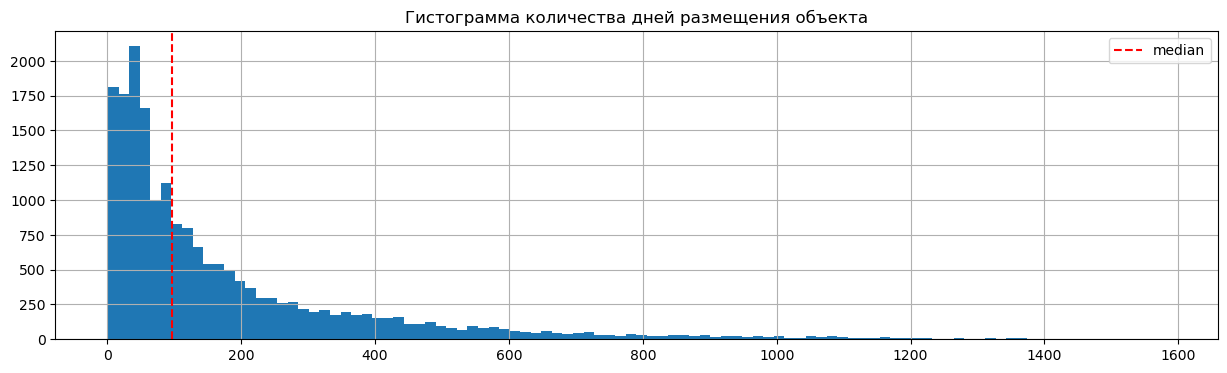

In [177]:
show_hist(data['days_exposition'],100, 'Гистограмма количества дней размещения объекта', (15,4))

In [178]:
# Значения параметров объектов недвижимости на разных квантилях
show_quantile (data, 'days_exposition')

,days_exposition
0.001200,3.00
0.010000,4.00
0.500000,97.00
0.990000,"1,064.44"
0.998800,"1,368.66"


Квантили распредеделения данных:

- 3 дня размещения объвления - значение, ниже которого находится 0.12% значений выборки
- 4 дня - значение, ниже которого находится 1% значений выборки
- 97 дней - медиана, значение, ниже которого находится 50% значений выборки
- 1064 дня - значение, ниже которого находится 99% значений выборки
- 1368 дней - значение, ниже которого находится 99.88% значений выборки

Отфильтруем данные для анализа, оставив только обьявления со сроком публикации более 3 дней, но менее 1000

In [179]:
data = data.query('days_exposition>3 and days_exposition<=1000 or days_exposition.isna()')

In [180]:
final_len = data.shape[0]

print(f"Потеря данных при предобработке составила {round(100 - final_len/len_data_1*100,2)} %")

Потеря данных при предобработке составила 8.55 %


Уровеня потери данных не критичный (при 5% оптимально, 10%-критично)

**Обработку аномальных значений и заполнение пропусков, где это возможно закончили. Общая потеря данных при обработке составила 8.5%**

In [181]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,673.00","21,673.00","21,673.00","18,664.00","21,673.00","20,016.00","19,686.00","21,673.00","21,673.00"
min,0.00,12.00,2.00,4.00,"430,000.00",10.00,4.00,1.00,1.00
max,7.00,441.98,5.30,"1,000.00","30,000,000.00",160.00,44.90,33.00,37.00


In [182]:
# check
# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988])
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.001200,0.00,20.30,2.40,4.00,"565,096.00",10.00,4.10,1.00,2.00
0.010000,1.00,26.00,2.50,5.00,"1,000,000.00",13.10,5.00,1.00,2.00
0.500000,2.00,51.60,2.70,96.00,"4,600,000.00",30.00,9.00,4.00,9.00
0.990000,5.00,158.53,3.53,864.00,"22,900,000.00",96.95,30.00,23.00,26.00
0.998800,7.00,215.20,4.10,977.60,"29,000,000.00",142.98,41.00,26.00,33.99


### Добавление в таблицу новых столбцов

**•	цена одного квадратного метра**

Для этого поделим цену на момент снятия с публикации на общую площадь объекта недвижимости с округлением до целого числа.

In [183]:
data['meter_price'] = round(data['last_price'] / data['total_area'])

И приведём значение к целочисленному int, методом astype()

In [184]:
data['meter_price'] = data['meter_price'].astype('int')

**•	день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)**

Используем метод dt.weekday. По аналогии создадим столбцы с месяцем и годом публикации объявления.

In [185]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

**•	месяц публикации объявления**

In [186]:
data['month_exposition'] = data['first_day_exposition'].dt.month

**•	год публикации объявления**

In [187]:
data['year_exposition'] = data['first_day_exposition'].dt.year

**•	тип этажа квартиры (значения — «первый», «последний», «другой»)**

Создадим функцию, которая возвращает тип этажа квартиры в зависимости от значений floor и floors_total, а именно:
    если квартира на первом этаже - тип этажа - первый;
    если этаж квартиры больше, чем первый и этажность дома больше этажа квариры - тип этажа - другой;
    если этаж квартиры больше, чем первый и равен общей этажности дома, то тип этажа - последний

Так как у нас есть пропуски в столбце floors_total, то в некоторых случаях категорию будет не определить. Тогда функция будет возвращать "no info in floors_total"

In [188]:
def categorize_floors (data):
    if data['floor'] == 1:
        return 'первый'
    elif 1 < data['floor'] < data['floors_total']:
        return 'другой'
    elif 1 < data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'no_info_in_floors_total'

Создадим новый столбец type_floor и так как в функции у нас задействовано несколько столбцов, то применим функцию ко всему датафрейму, значение axis установим 1, так как применяем ко всем строкам датафрейма.

In [189]:
data['type_floor'] = data.apply(categorize_floors, axis=1)

In [190]:
data['type_floor'].value_counts().to_frame()

,type_floor
другой,15986
последний,3001
первый,2686


Функция работает, данные в новый столбец добавлены.

**•	расстояние до центра города в километрах**

Для этого поделим значение в cityCenters_nearest на 1000 и округлим методом round, но сначала переименуем столбец для корректного отображения названия.

In [191]:
data['city_centers_km'] = round(data['city_centers_nearest']/1000,0)

In [192]:
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,meter_price,weekday_exposition,month_exposition,year_exposition,type_floor,city_centers_km
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,2.0,755.0,NaN,санкт-петербург,120370,3,3,2019,другой,16.0
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11.0,18.6,1,False,...,0.0,NaN,81.0,посёлок шушары,82921,1,12,2018,первый,19.0
2,10,"5,196,000.0",56.0,2015-08-20,2,2.7,5.0,34.3,4,False,...,2.0,574.0,558.0,санкт-петербург,92786,3,8,2015,другой,14.0


Столбец добавлен, данные отображаются корректно. Приступаем к следующему этапу.

## Исследовательский анализ данных.

Построим отдельные гистограммы для каждого из следующих параметров, опишем все наблюдения по каждому из них.

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления

### Стоимость, Общая площадь и площадь кухни

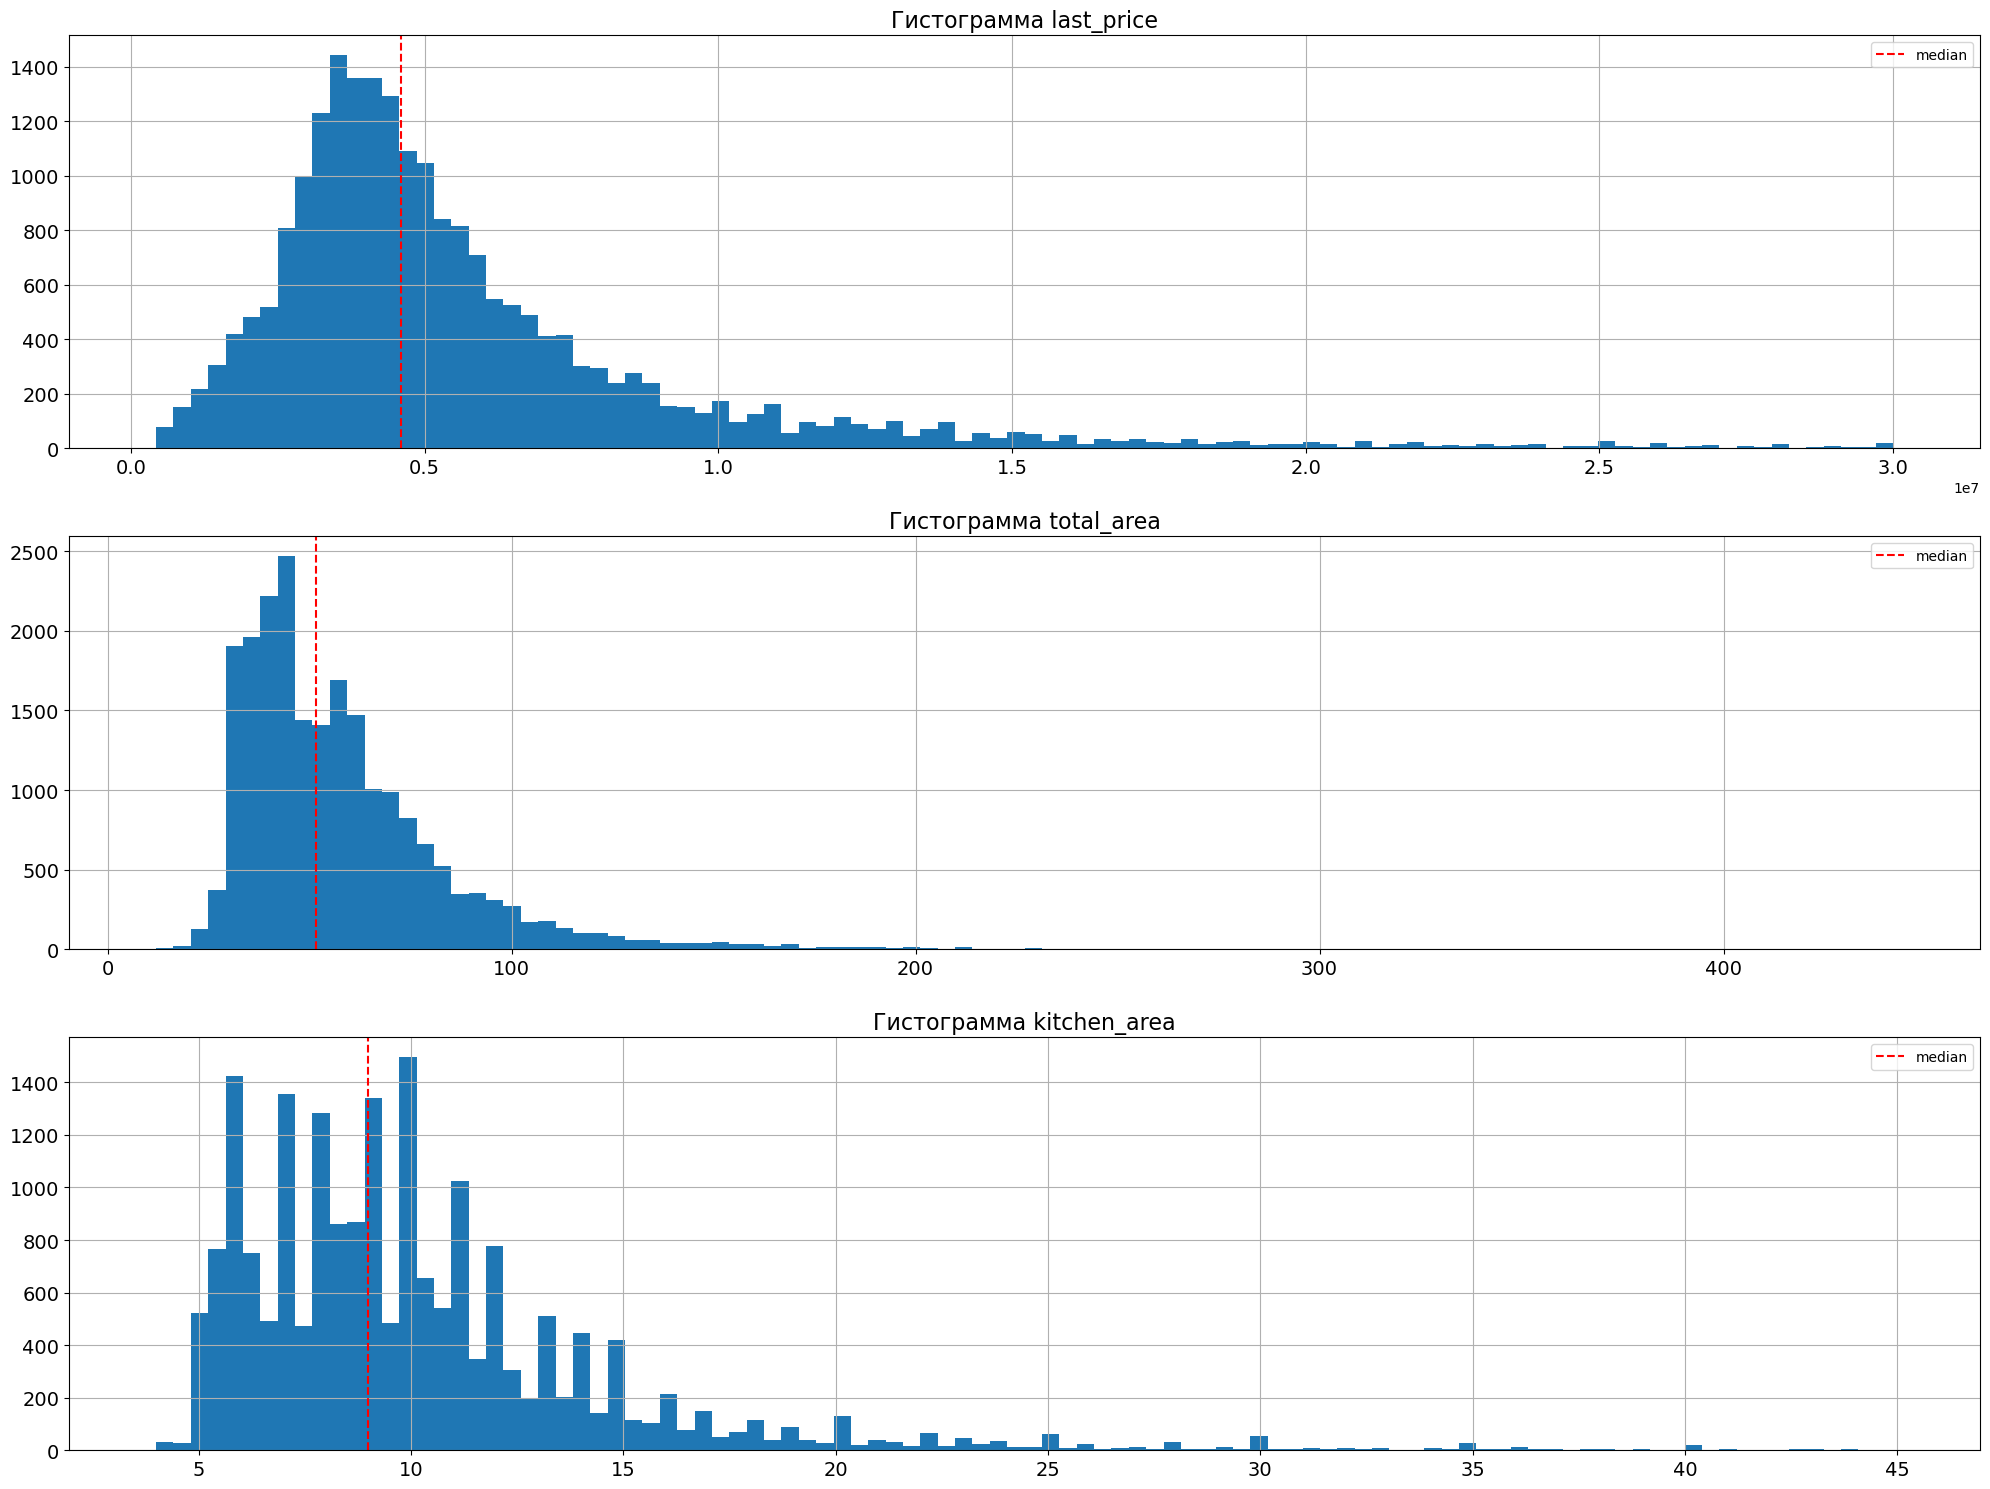

In [193]:
graphs = [data['last_price'], data['total_area'], data['kitchen_area'] ]

plot_subplots(3, graphs, (20,15), 100)

* **Цена объекта**

Самое большое количество объектов недвижимости имеют цену на момент снятия объявления с публикации от примерно 2 до 10 миллионов рублей. Пик значений приходится на цену 2.5 - 6 миллионов рублей за объект. После стоимости в 25 миллионов рублей график почти сливается с нулём.

* **Общая площадь**

Основное количество квартир имеют общую площадь от 30 до 80 квадратных метров. Пиковые количества на значениях около 30, 45, 60, 70, 80 квадратных метров

Можно предположить, что это самые распространённые показатели жилой площади для студий или 1-х квартир и для 2-х, 3-х комнатных квартир.

При значениях жилой площади от 60 квадратных метров количество предложений стремительно снижается, становясь единичными при значениях жилой площади от 100 квадратных метров.

* **Площадь кухни**


Максимальное количество объектов приходится на кухни с площадью около 6-15 метров.

После значения 20 квадратных метров, количество предложений стремительно снижается и после 30 метров остаются лишь единичные.

### Количество комнат, высота потолков, этаж квартиры, этажность дома

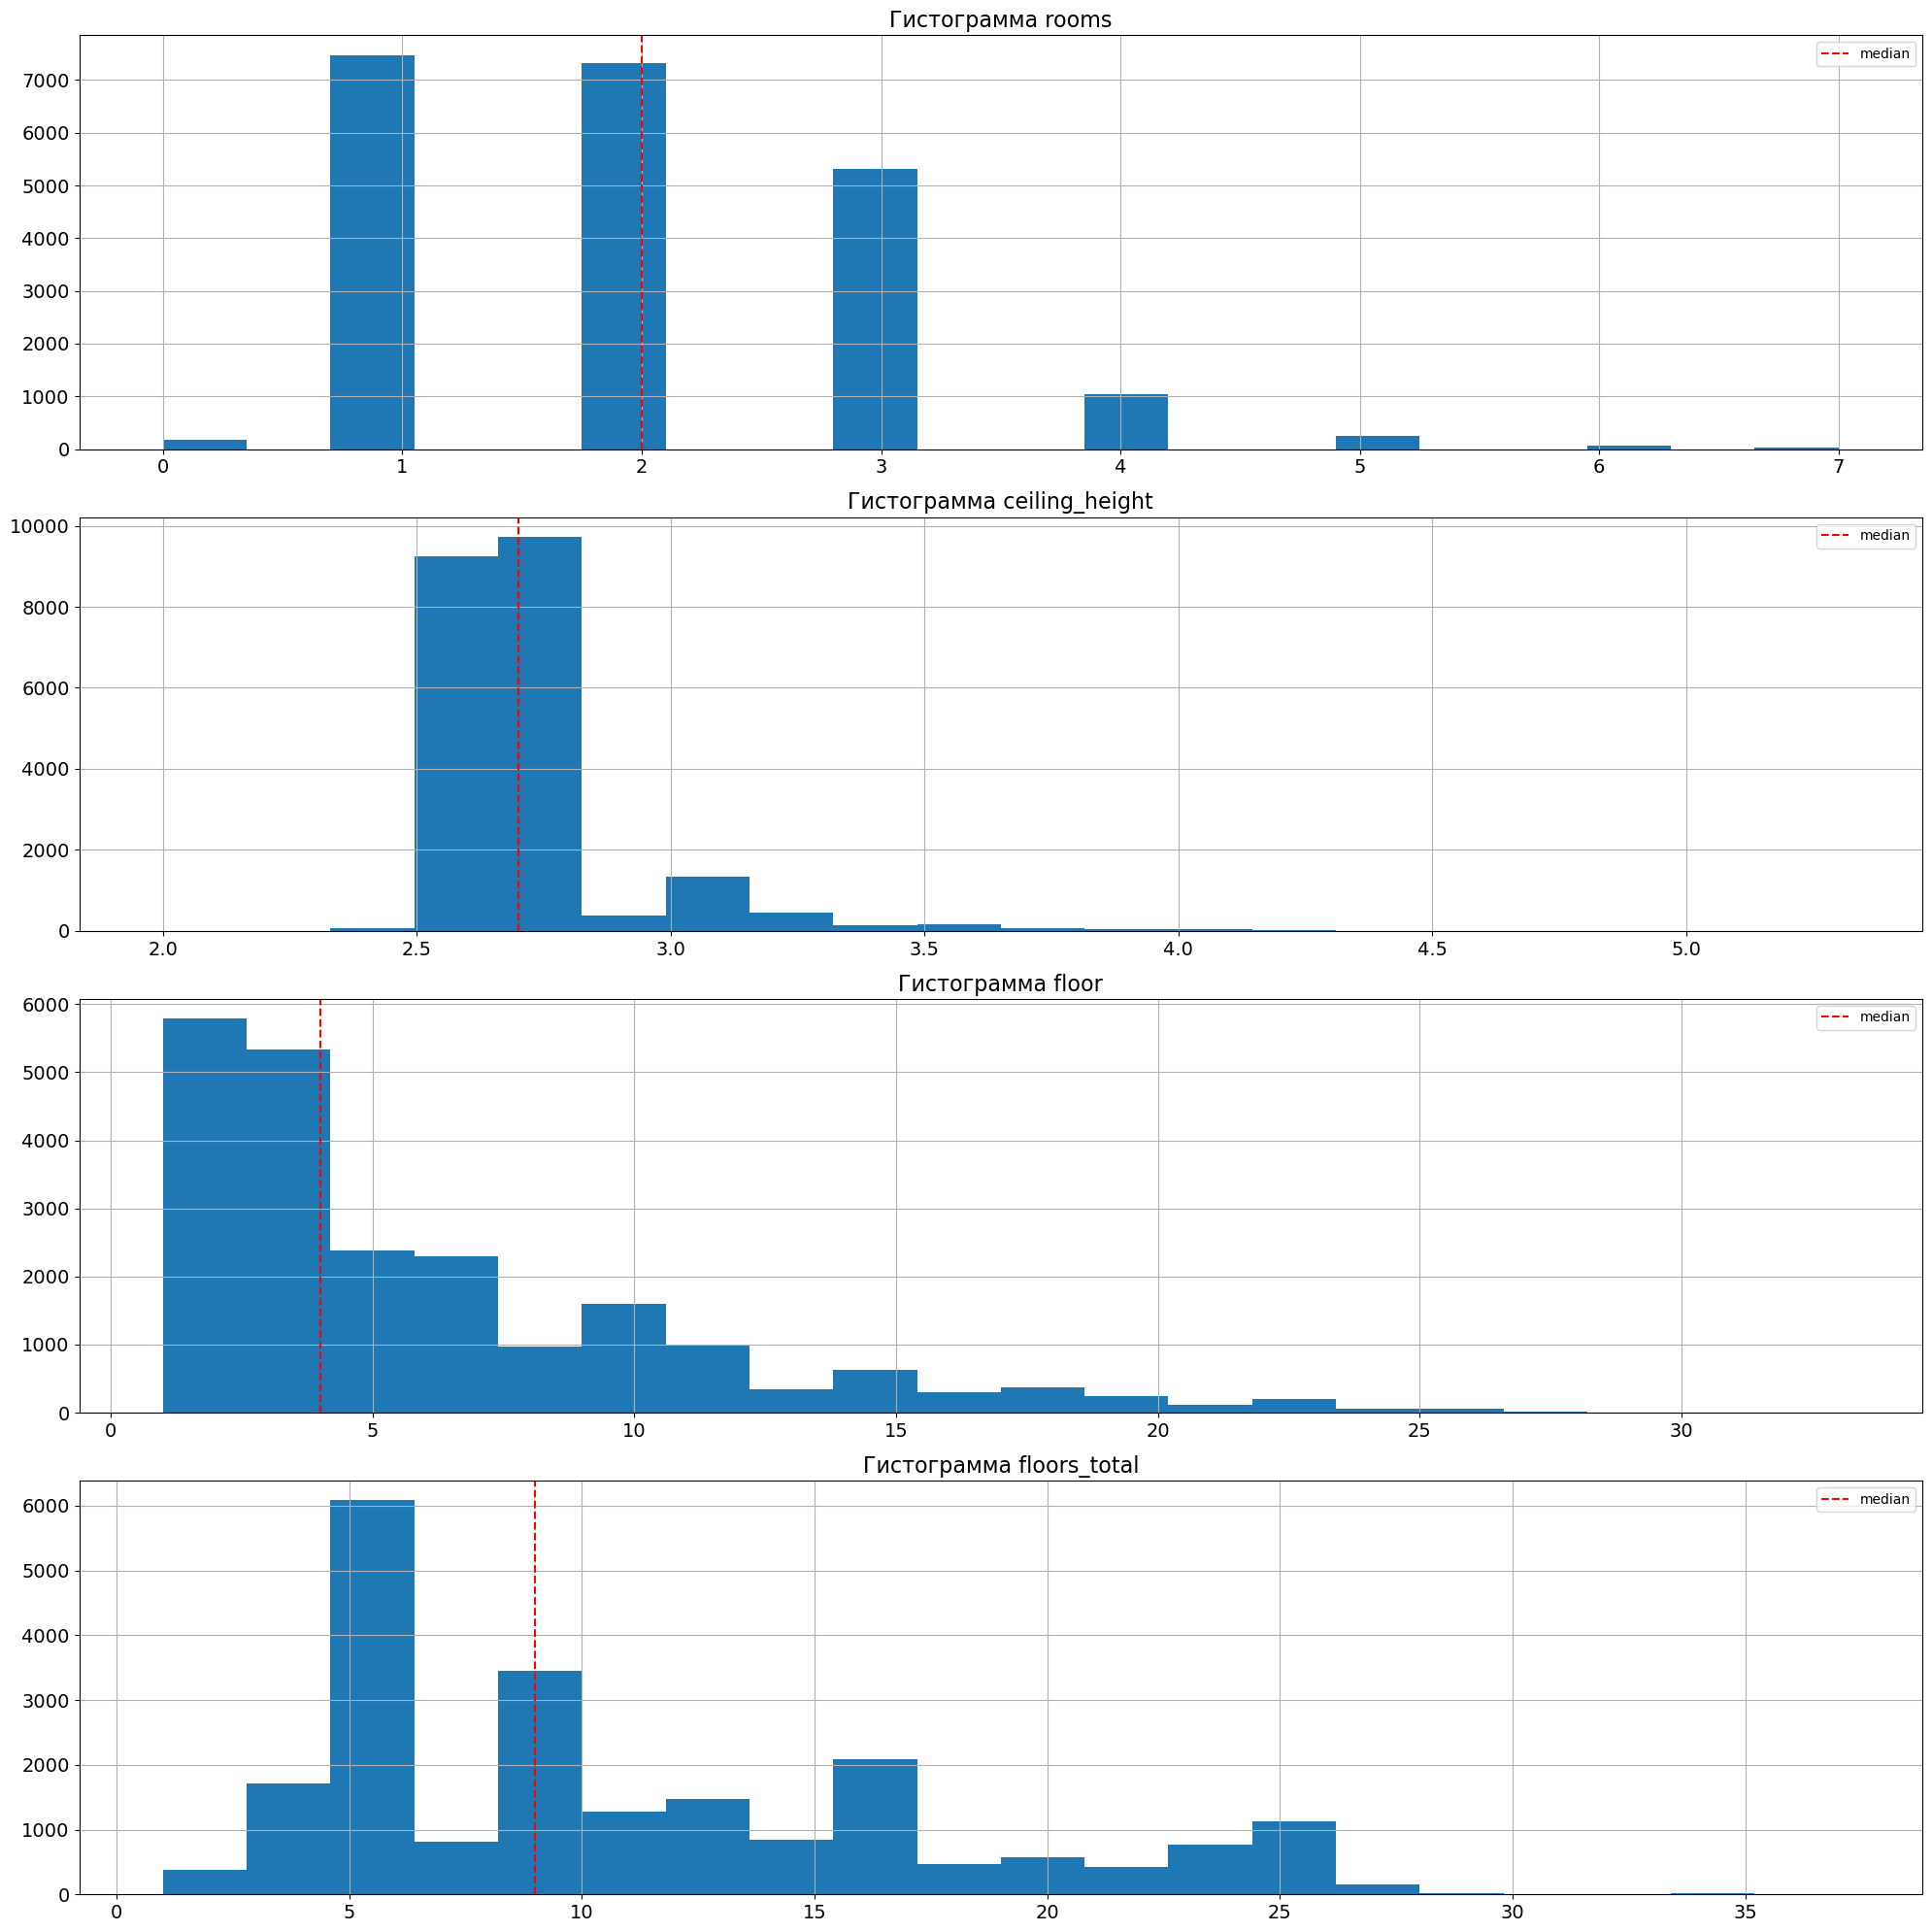

In [194]:
graphs = [data['rooms'], data['ceiling_height'],
          data['floor'], data['floors_total']]

plot_subplots(4, graphs, (20, 20), 20)

- Наибольшее количество квартир в это 1 и 2-х и 3-х - комнатные квартиры.
- Большинство квартир имеет высоту потолков от 2.5 до 3 м. Пиковые значения 2.5 м, 2.7 м
- Основная часть квартир, выставленных на продажу располагаются на 1-10 этажах при этом пик значений 1-5 этажи. После значения расположения квартиры на 5 этаже количество объявлений резко снижается
- Больше всего предложений о продаже квартир в 5-ти, 9-ти и 12 и 16-ти и 25-ти этажных домах.

* **Тип этажа квартиры («первый», «последний», «другой»)**

In [195]:
data['type_floor'].value_counts().to_frame()

,type_floor
другой,15986
последний,3001
первый,2686


**Максимальное количество квартир в наборе данных располагаются не на первом и не на последнем этажах.** При этом на последних этажах квартир представлено чуть больше, чем на первом.

* **Расстояние до ближайшего парка**

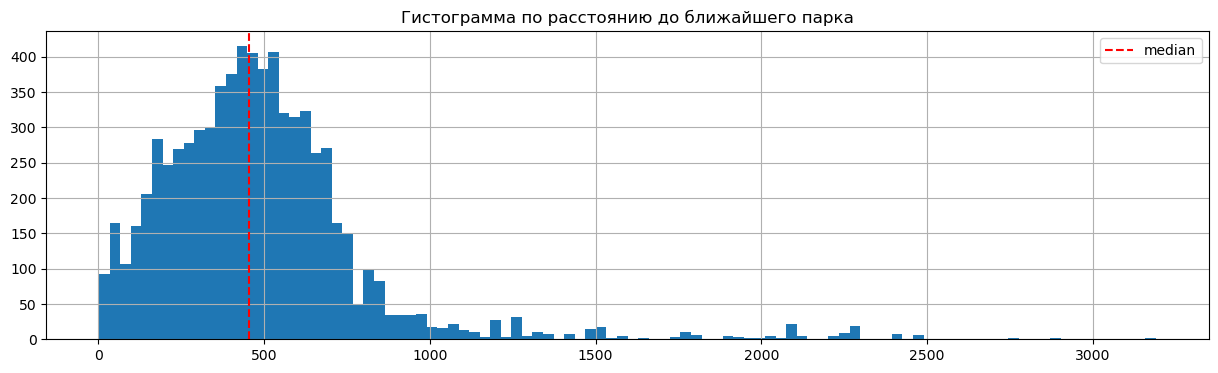

In [196]:
show_hist(data['parks_nearest'],100, 'Гистограмма по расстоянию до ближайшего парка',(15,4))

Максимальное количество объектов недвижимости из набора данных располагаются непосредственно рядом с парком, менее чем в 50 метрах от него до расстояния в 750 метров. 


* **День и месяц и год публикации объявления**

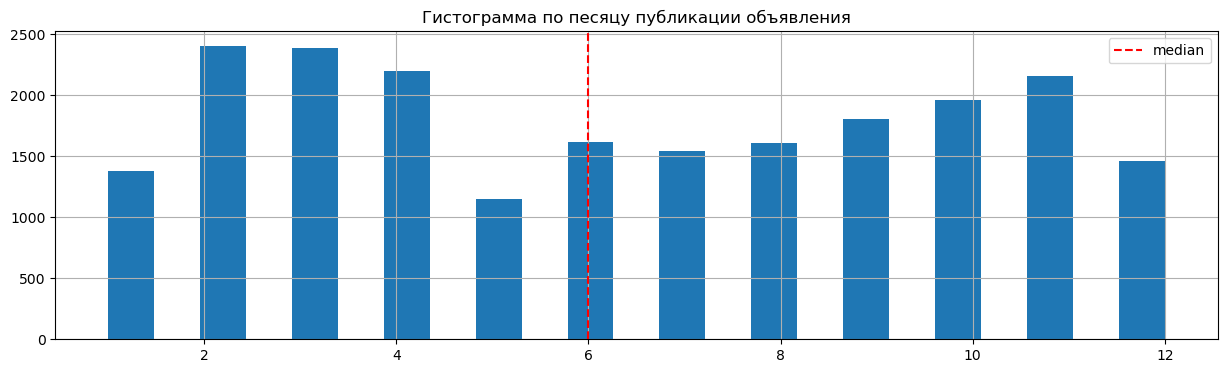

In [197]:
show_hist(data['month_exposition'],23, 'Гистограмма по песяцу публикации объявления',(15,4))

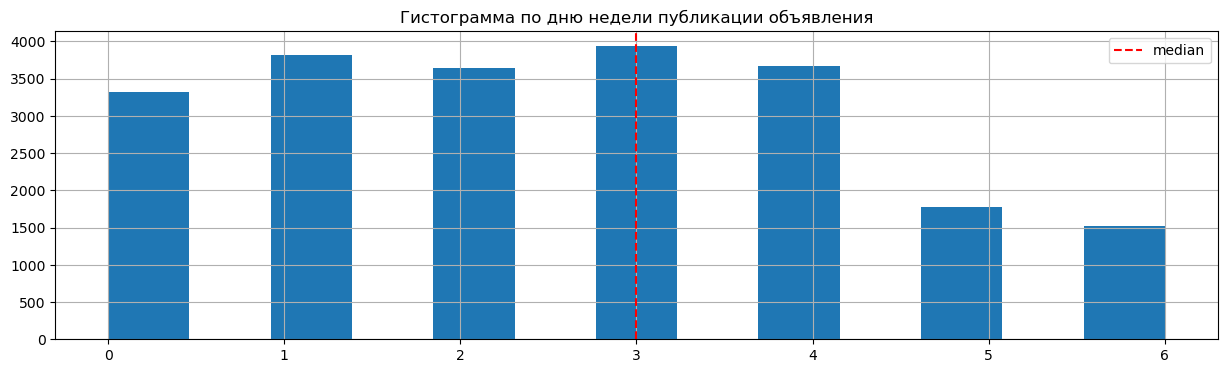

In [198]:
show_hist(data['weekday_exposition'],13, 'Гистограмма по дню недели публикации объявления',(15,4))

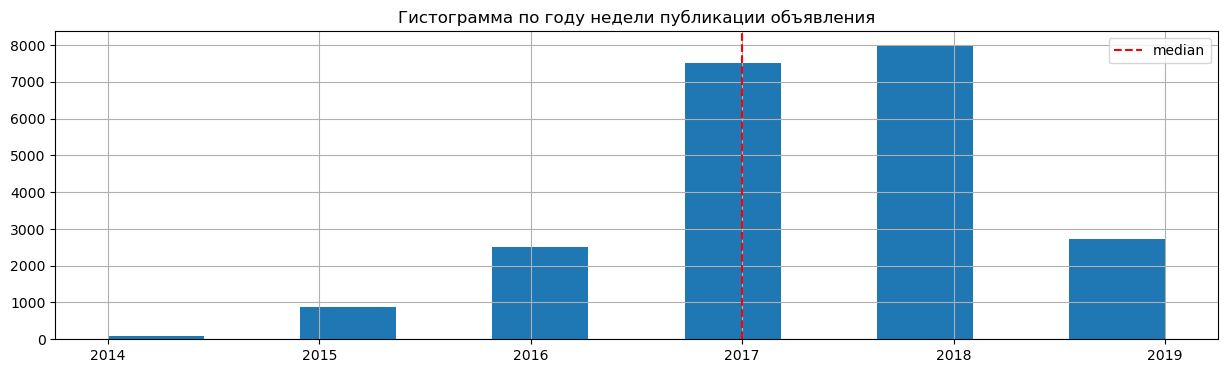

In [199]:
show_hist(data['year_exposition'],11, 'Гистограмма по году недели публикации объявления',(15,4))
 

Объявления чаще публикуются в будние дни с понедельника по пятницу. Чаще всего во вторник и четверг.

Интересно заметить, что активнее недвижимость покупают с февраля по апрель, затем в мае наступает резкий спад, в летние месяцы активность снижена, сентябрь-ноябрь вновь повышается.

Январь, май и декабрь самые не популярные месяцы для покупки недвижимости.

### Анализ длительноти продажи квартир.

Данные о сроках активности объявления в днях расположены в столбце days_exposition. Изучим среднее значение и медиану, построим гистограммы для выявления динамики зачений столбца.

In [200]:
data['days_exposition'].describe()

count   18,664.0
mean       169.1
std        187.0
min          4.0
25%         45.0
50%         96.0
75%        224.0
max      1,000.0
Name: days_exposition, dtype: float64

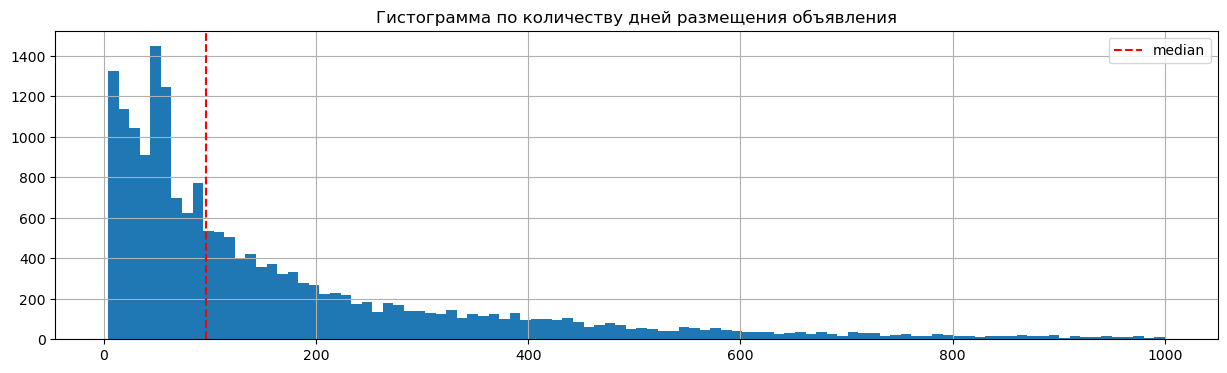

In [201]:
show_hist(data['days_exposition'],100, 'Гистограмма по количеству дней размещения объявления',(15,4))

Построим дополнительный график для детального изучения пиковых значений в диапазоне 0-200 дней с момента публикации объявления

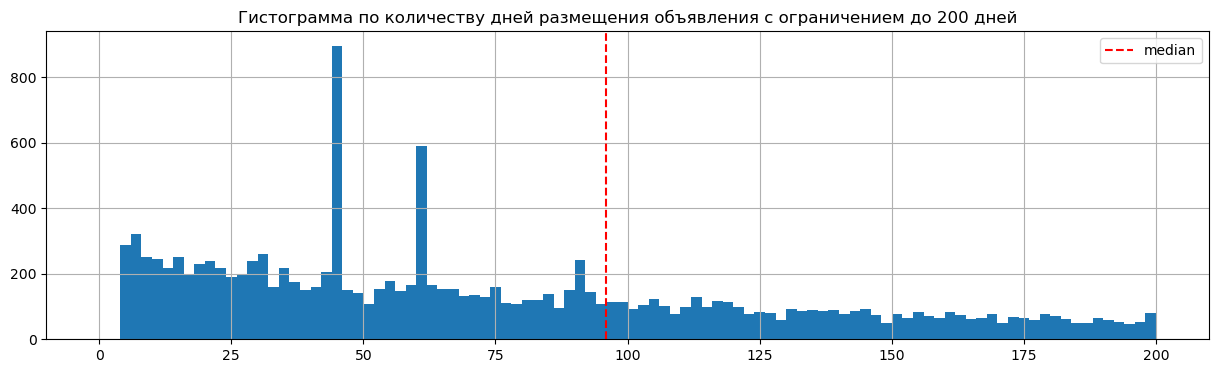

In [202]:
show_hist(data['days_exposition'], 100,
          'Гистограмма по количеству дней размещения объявления с ограничением до 200 дней', (15, 4), (0, 200))

Обращают на себя внимание два пиковых значения продажи квартир на 40-й , 60-й и 90-й день с момента публикации объявления. Можно предположить автоматическое снятие объявления с публикации.

После 200 дней количество продаж сильно снижается.

In [203]:
data['days_exposition'].describe()

count   18,664.0
mean       169.1
std        187.0
min          4.0
25%         45.0
50%         96.0
75%        224.0
max      1,000.0
Name: days_exposition, dtype: float64

Квартили распределения данных следующие:
- Q1 - объект проданы за 45 дней с момента публикации (25% элементов меньше, а 75% — больше этого значения)
- Q2 - объект продан за 90 дней с момента публикации (медианное значение)
- Q3 - объект продан за 231 день с момента публикации (75% элементов меньше и 25% элементов больше этого значения)

На основании вышеизложенного можно сделать вывод, что:
* **В среднем** продажа объекта недвижимости занимает 2-3 месяца. Наибольшее количество квартир продается за 40 либо 60 дней.
* **Быстрой продажей** можно считать сделку, заключённую меньше чем за 1 месяц с момента публикации объявления.
* **Долгой** можно считать сделку, заключенную более чем через 200 дней с момента публикации объявления.

**Проанализируем среднюю скорость продажи квартир по годам.**

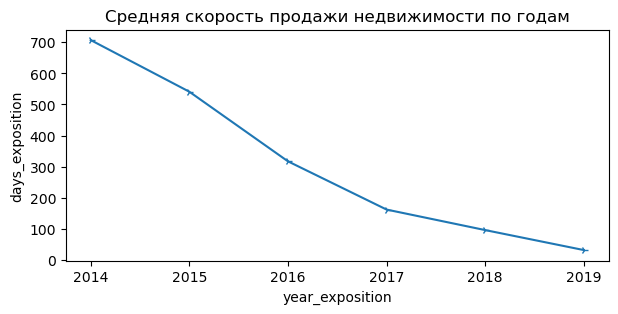

In [204]:
show_plot(data.groupby('year_exposition')['days_exposition'].mean(
), 'Средняя скорость продажи недвижимости по годам', 'days_exposition')

Наблюдается тренд на стремительное ускорение продажи объектов недвижимости с 800 дней в 2014 году до 100 дней в 2018.

Однако следует осторожно относится к этим данным, так как в наборе данных есть еще не проданные квартиры, которых нет в статистике о средней скорости продаж

### Вывод по исследовательскому анализу данных

В ходе работы мы изучили каждый из параметров объектов недвижимости, а именно:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления

**В ходе анализа обнаружено, что:**

1. **Максимальное количество квартир в наборе данных имеют общую площадь от 30 до 80 квадратных метров.**

 
2. **Наиболее часто встрчающиеся значения жилой площади: Пиковые значениях около 30, 45, 60, 70, 80 квадратных метров**
   Можно предположить, что это самые распространённые показатели жилой площади для студий или 1-х квартир и для 2-х, 3-х комнатных квартир.
   
    
3. **Максимальное количество объектов приходится на кухни с площадью около 6-15 метров.**


4. **Самое большое количество объеков недвижимости имеют цену от 2 до 10 миллионов рублей.**
    Пик значений приходится на цену 2.5 - 6 миллионов рублей за объект. 


5. **Наибольшее количество квартир в наборе данных это 1 и 2-х и 3-х - комнатные квартиры.** 


6. **Большинство квартир в наборе данных имеет высоту потолков от 2.4 до 3 м. Пиковые значения 2.5 м, 2.7 м**


7. **Основная часть квартир, выставленных на продажу располагаются на 1-10 этажах, при этом пик значений 1-5 этажи.**


8. **Максимальное количество квартир в наборе данных располагаются не на первом и не на последнем этажах.** При этом на последних этажах квартир представлено чуть больше, чем на первом.


9. **Больше всего предложений о продаже квартир в 5-ти, 9-ти и 12 и 16-ти и 25-ти этажных домах.**


10. **Наибольшее количество представленных объектов располагаются:**
- на расстоянии 5-20 километров от центра Санкт-Петербурга.
- на расстоянии 15-25 километров от аэропорта (также имеется пик на значении  36 километров (вероятно это густонаселённые пригороды, такие как Мурино и Кудрово)
- на расстоянии от 50 до 750 метров до ближайшего парка.


11. **Объявления чаще публикуются в будние дни, чаще всего во вторник и четверг.**
   
   Покупают недвижимость чаще в перид с февраля по апрель.
   В летние месяцы активность снижена, и самые не популярные месяцы для покупки недвижимости : январь, май и декабрь .


12. * **В среднем** продажа объекта недвижимости занимает 2-3 месяца. Наибольшее количество квартир продается за 40 либо 60 дней.
* **Быстрой продажей** можно считать сделку, заключённую меньше чем за 1 месяц с момента публикации объявления.
* **Долгой** можно считать сделку, заключенную более чем через 200 дней с момента публикации объявления.




## 	Определение факторов, которые больше всего влияют на общую (полную) стоимость объекта.
Для ответа на этот вопрос изучим зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

Построим графики и определим коэффициент корреляции, которые покажут зависимость цены от указанных выше параметров.

### общая площадь объекта недвижимости

Построим диаграмму рассеяния

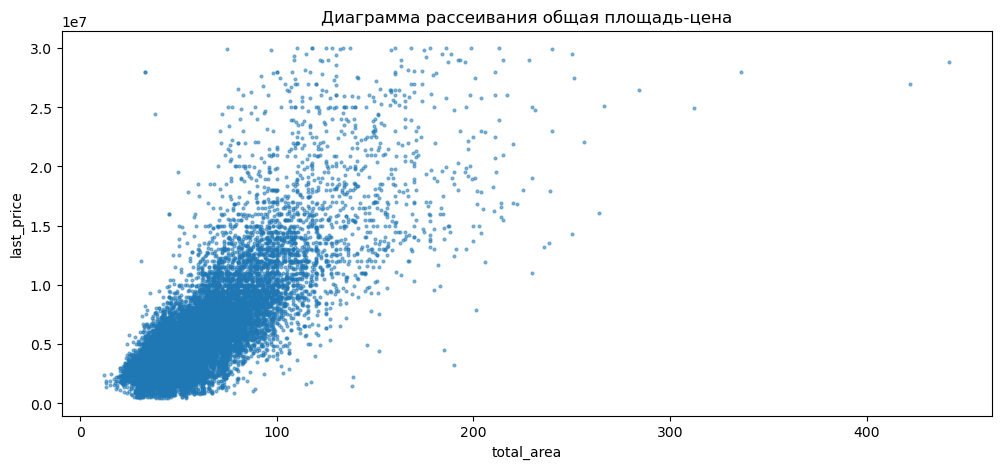

In [205]:
make_scatter ('total_area', 'last_price', 'общая площадь-цена')

На графике виден массив из наиболее часто встречающихся сочетаний общей площади и стоимости объекта. Заметно, что при увеличении площади, увеличивается и стоимость. При значениях площади больше 80 квадратных метров чаще появляются выбивающиеся значения по  очень высокой стоимости.

Найдём коэффициент корреляции Пирсона, методом corr() 

In [206]:
round(data['total_area'].corr(data['last_price']),2)

0.79

Корреляция в 0.78 говорит о наличии достаточно значительной связи.

### жилая площадь

Построим диаграмму рассеяния и определим коэффициент корреляции, по аналогии с анализом влияния общей площади.

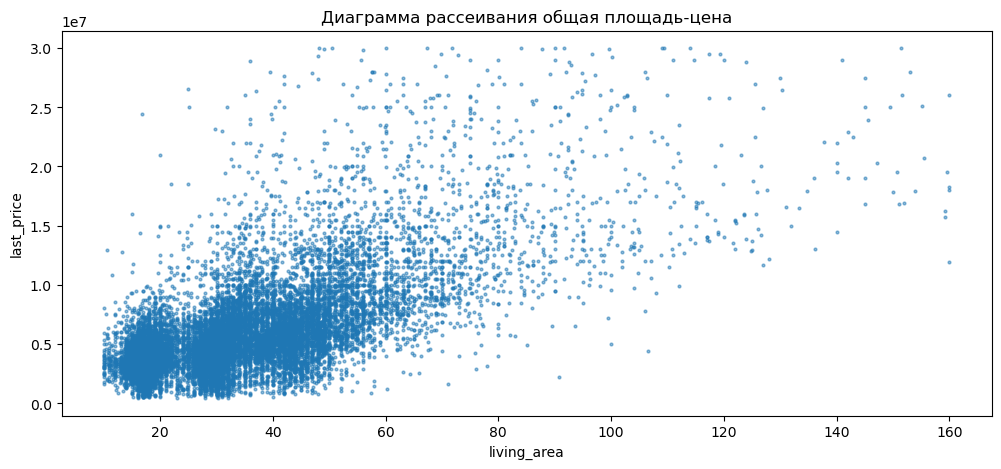

In [207]:
make_scatter ('living_area', 'last_price', 'общая площадь-цена')

График показывает, что жилая площадь не сильно влияет на стоимость. Безусловно влияние есть, при увеличении жилой площади стоимость объекта увеличивается, однако как при значениях жилой площаи 20 квадратных метров, так и 60 встречаются объекты, значительно превышающие среднюю стоимость. При увеичении площади их становится больше, но и объектов по достаточно не высокой стоимости остаётся много при любых значениях жилой площади.

In [208]:
round(data['living_area'].corr(data['last_price']),2)

0.69

Корреляция в 0.68 также говорит о наличии не сильной связи, однако стоит отметить, что коэффициент корреляции у общей площади квартиры выше, чем жилой.

### площадь кухни

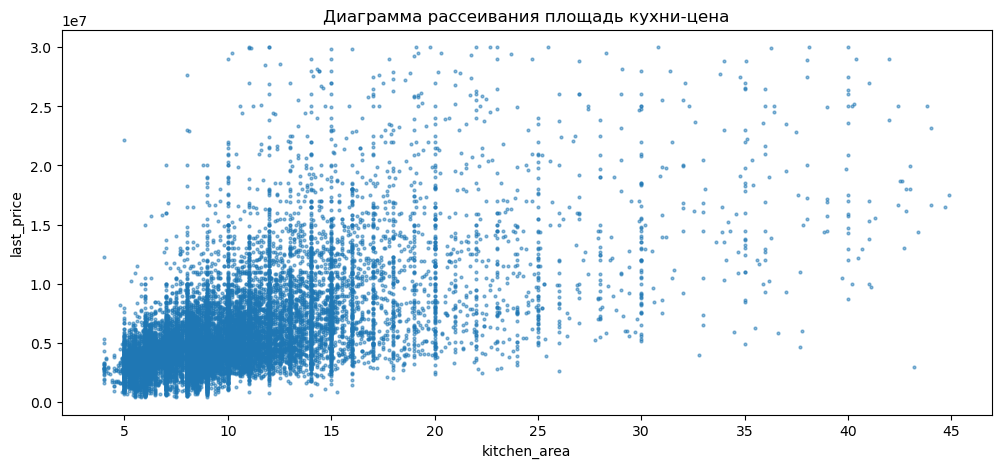

In [209]:
make_scatter ('kitchen_area', 'last_price', 'площадь кухни-цена')

In [210]:
round(data['kitchen_area'].corr(data['last_price']),2)

0.61

Прослеживается достаточно слабая взаимосвязь этих параметров. 

### количество комнат

Построим сводную таблицу по категориальным признакам с расчетом среднего значения стоимости объекта. Расчет среднего нам подходит, так как мы очистили данные от аномальных значений.

In [211]:
# построение сводной таблицы
data_pivot_rooms = data.pivot_table(index=['rooms'], values='last_price', aggfunc=['mean', 'count'])
data_pivot_rooms.columns = ['mean_price', 'number_of_objects']
data_pivot_rooms

,mean_price,number_of_objects
rooms,,
0,"3,010,108.2",184
1,"3,820,547.2",7476
2,"5,446,618.1",7323
3,"7,417,101.6",5318
4,"10,301,490.2",1033
5,"13,274,659.6",243
6,"15,926,235.8",67
7,"18,876,896.6",29


В целом видна взаимосвязь. При увеличении количества комнат, увеличивается и стоимость объекта, что логично, так как увеличивается количество квадратных метров.

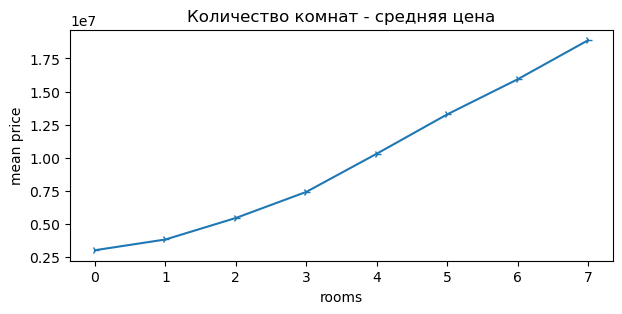

In [212]:
show_plot (data_pivot_rooms['mean_price'], 'Количество комнат - средняя цена', 'mean price')

In [213]:
cor = round(data['rooms'].corr(data['last_price']),2)
print(f"Корреляция составляет: {cor}")

Корреляция составляет: 0.51


На графике видно плавное увеличение средней стоимости объектов при увеличении количества комнат. Корреляция выражена слабо

### этаж, на котором расположена квартира (первый, последний, другой)

In [214]:
data_pivot_floor = data.pivot_table(index=['type_floor'], values='last_price', aggfunc=['mean', 'count'])
data_pivot_floor.columns = ['mean_price', 'number_of_objects']
data_pivot_floor

,mean_price,number_of_objects
type_floor,,
другой,"5,960,742.0",15986
первый,"4,536,553.5",2686
последний,"5,482,861.4",3001


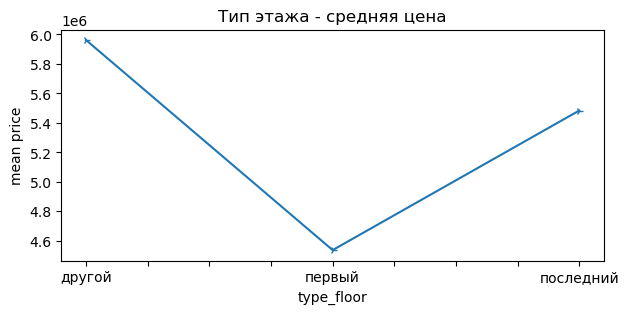

In [215]:
show_plot(data.groupby('type_floor')['last_price'].mean(
), 'Тип этажа - средняя цена', 'mean price',)

Квартиры на первом этаже имеют наименьшую стоимость, чуть дороже квартиры на последнем этаже. Цены на квартиры не на первом и не на последнем этажах значительно выше.

### дата размещения объявления о продаже (день недели, месяц, год) 

- день недели

In [216]:
data_pivot_day = \
data.pivot_table(index=['weekday_exposition'], values='last_price', aggfunc= ['mean', 'count'])

data_pivot_day.columns = ['mean_price', 'number_of_objects']
data_pivot_day

,mean_price,number_of_objects
weekday_exposition,,
0,"5,756,621.1",3314
1,"5,714,360.2",3821
2,"5,856,039.7",3640
3,"5,829,547.2",3938
4,"5,642,419.5",3664
5,"5,499,929.8",1775
6,"5,461,352.4",1521


Построим график для визуализации изменения цен в зависимости от дня недели.

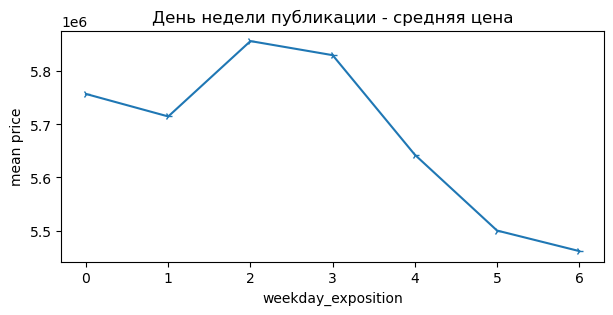

In [217]:
show_plot(data.groupby('weekday_exposition')['last_price'].mean(
), 'День недели публикации - средняя цена', 'mean price')

Наблюдается небольшое снижение стоимости объекта, объявление о котором опубликовано с пятницы по воскресение.

- месяц публикации

In [218]:
data_pivot_month = \
data.pivot_table(index=['month_exposition'], values='last_price', aggfunc=['mean', 'count'])

data_pivot_month.columns = ['mean_price', 'number_of_objects']
data_pivot_month

,mean_price,number_of_objects
month_exposition,,
1,"5,805,107.4",1377
2,"5,755,638.8",2405
3,"5,664,946.4",2387
4,"5,734,636.3",2199
5,"5,686,919.4",1147
6,"5,520,083.6",1619
7,"5,729,012.3",1546
8,"5,693,342.8",1608
9,"5,872,690.7",1804


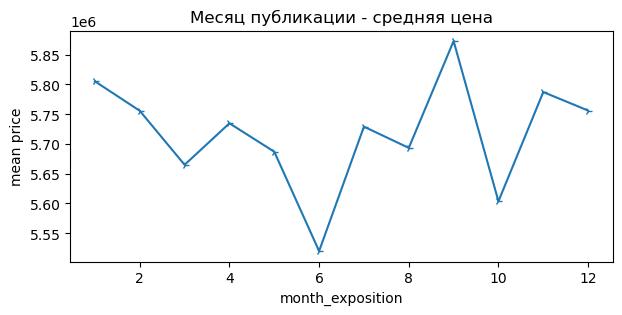

In [219]:
show_plot(data.groupby('month_exposition')['last_price'].mean(
), 'Месяц публикации - средняя цена', 'mean price')

Наблюдается небольшое снижение цен на объекты, публикация объявления о которых происходит с мая по июль. Затем происходит резкое подорожание, так, на объекты, опубликованные в августе цена максимально высокая. С сентября цена вновь немного снижается.

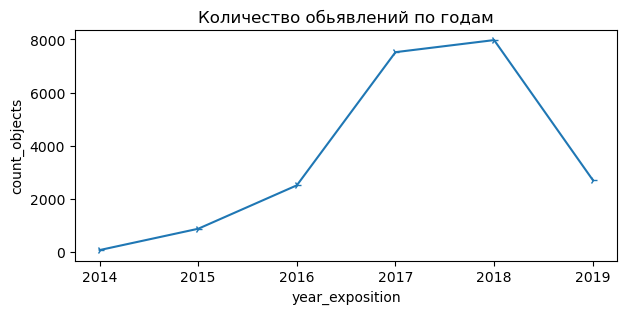

In [220]:
show_plot(data.groupby('year_exposition')['total_area'].count(
), 'Количество обьявлений по годам', 'count_objects')

In [221]:
data_pivot_year = \
data.pivot_table(index=['year_exposition'], values=('last_price', 'total_area'), aggfunc=['mean'])

data_pivot_year.columns = ['mean_price', 'mean_total_area']
data_pivot_year

,mean_price,mean_total_area
year_exposition,,
2014,"9,897,408.3",83.8
2015,"6,479,495.8",65.5
2016,"5,749,035.2",59.6
2017,"5,651,236.1",58.1
2018,"5,531,652.6",56.5
2019,"6,057,135.1",57.2


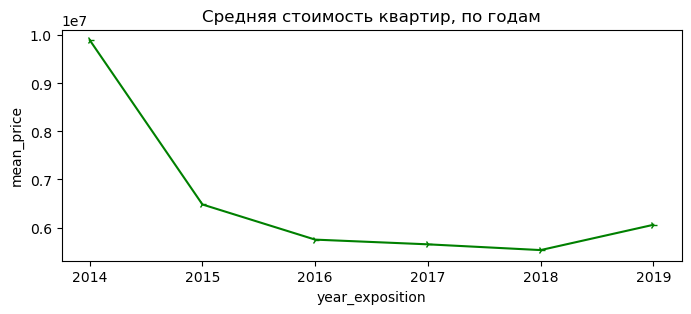

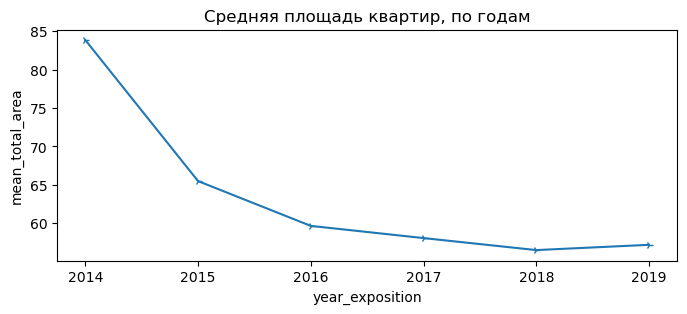

In [222]:
plt.title('Средняя стоимость квартир, по годам')
plt.ylabel('mean_price')
data_pivot_year['mean_price'].plot(style='4-', figsize=(8,3), color = 'g')
plt.show()

plt.title('Средняя площадь квартир, по годам')
plt.ylabel('mean_total_area')
data_pivot_year['mean_total_area'].plot(style='4-', figsize=(8,3));
plt.show()

Объектов недвижимости за 2014 год в итоговом наборе данных представлено всего 35, что недостаточно для точного утверждения резкого падения цен на недвижимость в 2015 году, однако его можно предположить в связи с кризисом 2014-2015 гг и продолжающемся снижением цен в 2015 году на графике.

В 2016-2018 годах цены на недвижимость были примерно на одном уровне и в 2019 году наблюдается повышение средней стоимости объекта.

При этом заметно постепенное уменьшение общей площади продаваемых объектов с течением лет, при этом при возрастании средней стоимости в период 18-19 гг средняя площадь всё равно уменьшается.

**Вывод**

**При изучении факторов, которые влияют на общую (полную) стоимость объекта обнаружено, что:**

Все рассмотренные факторы по отдельности не обладают достаточно выраженным влиянием на стоимость объекта.

Вероятно решающее значение имеет совокупность нескольких факторов. Так напимер, квартира с большой общей площадью, но расположенная на первом этаже, будет более доступна по цене, чем аналогичная квартира несколькими этажами выше.

Так, наибольшее влияние на общую стоимость объекта среди рассмотренных факторов оказывает его общая площадь (корреляция 0.68).
Далее по степени влияния располагается жилая площадь объекта (корреляция 0.51), площадь кухни (корреляция 0.49) и количество комнат (корреляция 0.36) так же дополнительно первично рассмотрено влияние удалённости объекта от центра города, и этот параметр имеет коэффициент (-0.32)что говорит о наличии связи, хоть и не сильно выраженной. Однако, судя по графику все объекты недвижимости, стоимостью 30 и более миллионов рублей располагаются в радиусе 10 километров от центра города.



## Дополнительные вопросы

### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Выделим 10 самых часто встречающихся населённых пунктов и рассчитаем медианную стоимость квадратного метра в них с помощью сводной таблицы. Отсортируем полученные значения в порядке убывания количества объявлений.

In [223]:
data_pivot_locality = data.pivot_table(
    index=['new_locality_name'], values='meter_price', aggfunc=['median', 'count'])

data_pivot_locality.columns = ['median_meter_price', 'number_of_objects']

top_10 = data_pivot_locality.sort_values(by='number_of_objects', ascending = False).head(10)
top_10

,median_meter_price,number_of_objects
new_locality_name,,
санкт-петербург,"104,391.0",14266
посёлок мурино,"85,619.5",494
посёлок шушары,"77,223.5",410
г. всеволожск,"65,789.0",379
г. пушкин,"100,000.0",333
посёлок парголово,"91,337.0",310
г. колпино,"75,000.0",290
г. гатчина,"67,188.0",289
деревня кудрово,"91,499.5",274


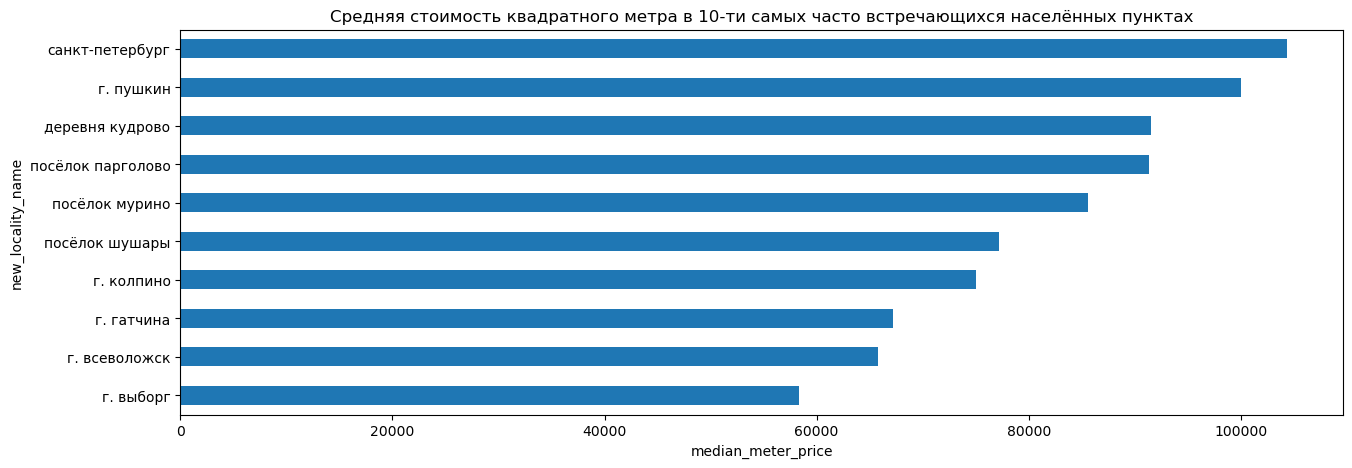

In [224]:
plt.title('Средняя стоимость квадратного метра в 10-ти самых часто встречающихся населённых пунктах')
plt.xlabel('median_meter_price')
top_10['median_meter_price'].sort_values().\
    plot(kind='barh', figsize=(15, 5))
plt.show()

In [225]:
max_m = top_10['median_meter_price'].max()
min_m = top_10['median_meter_price'].min()

print ('В 10-ти самых популярных населенных пунктах:')
print (f"- самая высокая средняя стоимость квадратного метра составляет - {max_m} руб.")
print (f"- самая низкая средняя стоимость квадратного метра составляет - {min_m} руб.")

В 10-ти самых популярных населенных пунктах:
- самая высокая средняя стоимость квадратного метра составляет - 104391.0 руб.
- самая низкая средняя стоимость квадратного метра составляет - 58357.5 руб.


**Рейтинг по кол-ву объявлений**

| Населенный пункт | Кол-во объявлений |
|:---------|:---------|
| Санкт-Петербург | 14266 |
| Мурино |494 |
| Шушары | 410 |
| Всеволожск | 379 |
| Пушкин | 333 |
| Парглово | 310 |
| Гатчина | 289 |
| Колпино | 290 |
| Кудрово | 274 |
| Выборг | 228 |

**Рейтинг по стоимости квадратного метра (в тыс. руб):**

| Населенный пункт | Квадратный метр (в тыс. руб)|
|:---------|:---------|
| Санкт-Петербург |104|
| Пушкин |100|
| Кудрово |91,5|
| Парголово |91,3|
| Мурино|85,6|
| Шушары |77,2|
| Колпино |75|
| Гатчина |67,2|
| Всеволожск |65,8|
| Выборг |58,4|

- Десятку лидеров по количеству объявлений в наборе данных занимает Санкт-Петербург (14417 объявлений), в нём же самая высокая средняя стоимость квадратного метра - более 104 тысяч рублей.
- Самая низкая стоимость одного квадратного метра в г. Выборг - 58 тысяч за 1 квадратный метр, количество объявлений в нём также наименьшее из выбранных 10-ти населённых пунктов - 229 объявлений.

### Как стоимость объектов зависит от расстояния до центра города. Вычисление средней цены каждого километра.

Для выполнения задачи отфильтруем данные, оставив только Санкт-Петербург, сгруппируем по расстоянию до центра в километрах и рассчитаем среднюю стоимость объектов недвижимости на данном километре от центра.

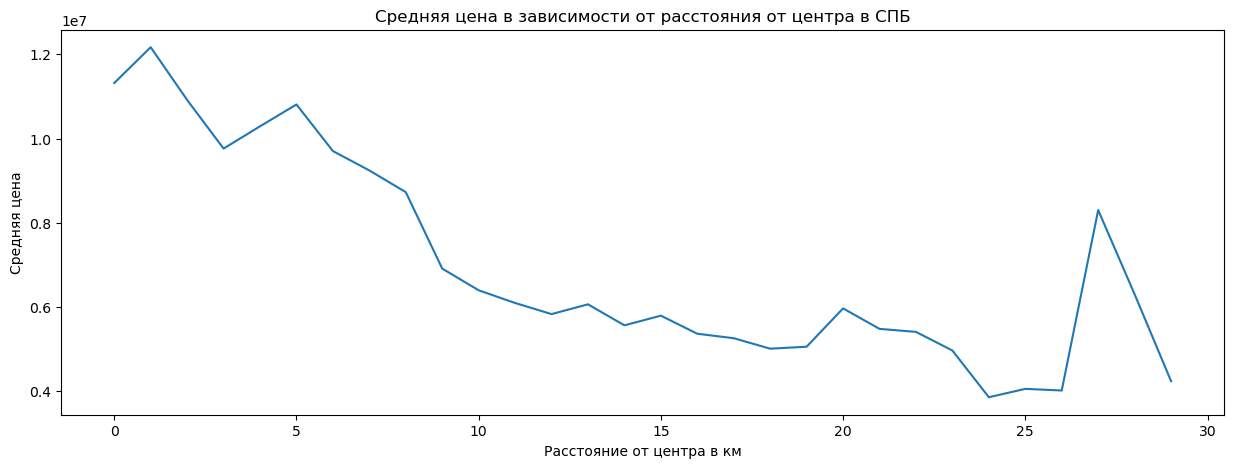

In [226]:
data.query('new_locality_name == "санкт-петербург"').groupby('city_centers_km')['last_price'].mean()\
    .plot(figsize = (15,5), title = 'Средняя цена в зависимости от расстояния от центра в СПБ')
plt.xlabel('Расстояние от центра в км')
plt.ylabel('Средняя цена')
plt.show()

In [227]:
cor = round(data.query('new_locality_name == "санкт-петербург"')
            ['city_centers_km'].corr(data['last_price']), 2)
print(f"Корреляция составляет: {cor}")

Корреляция составляет: -0.41


Самые дорогие объекты недвижимости расположены непосредственно в центре города, в радиусе 5-ти километров.

После значения 5 км от центра стоимость постепенно снижается.

Согласно коэффициенту корреляции (-0,41) взаимосвязь есть, но в меньшей степень, чем ожидалось. 

**Изучим пик на значении 27 км.**

In [228]:
data.query('new_locality_name == "санкт-петербург" and city_centers_km==27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,meter_price,weekday_exposition,month_exposition,year_exposition,type_floor,city_centers_km
748,13,"14,350,000.0",74.0,2017-11-28,2,3.1,5.0,30.0,3,False,...,0.0,NaN,128.0,санкт-петербург,193919,1,11,2017,другой,27.0
5961,6,"2,250,000.0",32.0,2018-02-27,1,2.7,2.0,16.5,2,False,...,0.0,NaN,178.0,санкт-петербург,70312,1,2,2018,последний,27.0


Одна квартира на 27-км, стоимостью более 14 миллионов вызвала всплеск на графике. Возможно что это квартира премиум-класса в пригороде Санкт-Петербурга. Удалять её или дополнительно фильтровать данные считаю нецелесообразным, так как такая квартира вполне имеет место быть, не смотря на то, что она двухкомнатная, но общая площадь достаточно большая.

Также на графике набюдается резкое падение средней стоимость объектов на 3-м километре, а на 5-м километре резкий скачок, после которого идет плавный спад средней стоимости. Изучим явление подробнее.

In [229]:
# check
data.query('new_locality_name == "санкт-петербург" and city_centers_km == 3')\
.pivot_table(index=['city_centers_km', 'type_floor'],values=('total_area'), aggfunc=['count'])

count
                           total_area
city_centers_km type_floor           
3.0             другой            191
                первый             49
                последний          67

In [230]:
data.query('new_locality_name == "санкт-петербург" and city_centers_km == 5')\
.pivot_table(index=['city_centers_km', 'type_floor'],values=('total_area'), aggfunc=['count'])

count
                           total_area
city_centers_km type_floor           
5.0             другой            595
                первый             72
                последний         120

In [231]:
data.query('new_locality_name == "санкт-петербург" and city_centers_km == 3')\
.pivot_table(index=['city_centers_km', 'type_floor'],values=('last_price'), aggfunc=['mean'])

mean
                             last_price
city_centers_km type_floor             
3.0             другой     10,295,074.9
                первый      7,592,446.9
                последний   9,824,723.9

In [232]:
data.query('new_locality_name == "санкт-петербург" and city_centers_km == 5')\
.pivot_table(index=['city_centers_km', 'type_floor'],values=('last_price'), aggfunc=['mean'])

mean
                             last_price
city_centers_km type_floor             
5.0             другой     10,914,962.7
                первый      7,978,938.5
                последний  11,980,678.7

In [233]:
data.query('new_locality_name == "санкт-петербург" and (city_centers_km == 3 or city_centers_km == 5)')\
.pivot_table(index=['city_centers_km'],values=('last_price'), aggfunc=['mean'])

,mean
,last_price
city_centers_km,
3.0,"9,761,060.9"
5.0,"10,808,853.7"


При анализе объектов недвижимости на 3 и 5 километре обнаружено, что на 5-м километре количество квартир в зависимости от этажа расположения в категориях "другой" и "последний" гораздо больше, чем на 3-м километре и их срелняя стоимость значительно выше.

## Общий вывод

В ходе исследования ставилась задача:
    **Изучить данные сервиса Яндекс Недвижимость за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах, на основании которых выяснить какие факторы больше всего влияют на общую (полную) стоимость объекта.**
    
    А именно, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год)
* расстояния до центра города

При проведении исследования обнаружено, что:

**Все рассмотренные факторы по отдельности не обладают достаточно выраженным влиянием на стоимость объекта.**

**Вероятно решающее значение имеет совокупность нескольких факторов.** Так напимер, квартира с большой общей площадью, но расположенная на первом этаже, будет более доступна по цене, чем аналогичная квартира несколькими этажами выше.

Так, **наибольшее влияние** на общую стоимость объекта среди рассмотренных факторов оказывает его **общая площадь**

Далее по степени влияния располагаются:
* жилая площадь объекта,
* площадь кухни,
* количество комнат

Коэффициенты положительны, что говорит о том, что при увличеннии показателя увеличивается и стоимость.

Этаж на котором расположена квартира и даты размещения оказывают влияние в меньшей степени или почти не оказывают.

**При анализе такого важного показателя, как удалённость от центра, обнаружено, что самые дорогие объекты недвижимости расположены непосредственно в центре города, в радиусе 5-ти километров.**


Согласно коэффициенту корреляции взаимосвязь отдалённости от центра и стоимости объекта есть, но не достаточно сильная, чтобы назвать этот фактор решающим в определении стоимости жилья. Отрицательный коэффициент говорит о том, что при увеличении параметра - расстояние от центра в километрах, стоимость недвижимости уменьшается, что предсказуемо.

**Дополнителные данные, полученные при исследовании:**

В исследуемом наборе данных **наибольшее количество предложений о продаже недвижимости** представлено в:
* г. Санкт-Петербурге в нём же **самая высокая средняя стоимость квадратного метра - 104 тыс. руб за 1 м2**
* г. Мурино  - 86 тыс. руб за 1 м2
* г. Кудрово  - 95 тыс. руб за 1 м2
* пос. Шушары  - 76 тыс. руб за 1 м2
* г. Всеволожск  - 76 тыс. руб за 1 м2

Среди 10-ти населённый пунктов с самым большим количеством объявлений последний в рейтинге - **г. Выборг , стоимость квадратного метра у него также наименьшая 58 тыс. руб за 1 м2 среди населённых пунктов рейтинга.**


**Сроки продажи недвижимости**

**В среднем** продажа объекта недвижимости занимает 2-3 месяца. 

**Быстрой продажей** можно считать сделку, заключенную меньше чем за 1 месяц с момента публикации объявления.
    
**Долгой** можно считать сделку, заключенную более чем через 200 дней с момента публикации объявления.

Объявления о продаже чаще публикуются в будние, чаще всего во вторник и четверг.
Покупают же недвижимость активнее с февраля по апрель, затем в мае наступает резкий спад, в летние месяцы активность снижена, а в сентябре-ноябре вновь повышается.

Январь, май и декабрь самые не популярные месяцы для покупки недвижимости.
